## **EDA**

In [ ]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#overriding default setting of pandas
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Loading Data

In [ ]:
downloaded = drive.CreateFile({'id':'10gjFhEZ_kpIpex5fPFQl6fyInRky4oGR'}) 
downloaded.GetContentFile('aisles.csv') 

downloaded = drive.CreateFile({'id':'1Dpv1X2l1j3LbOYJiNOq6Jn8nxOBX-eYv'}) 
downloaded.GetContentFile('departments.csv') 

downloaded = drive.CreateFile({'id':'1wnANhO4hhexvJNCobxvEpPKhOKSZ3gZ3'}) 
downloaded.GetContentFile('prior_order.csv') 

downloaded = drive.CreateFile({'id':'1zb0XtHo3c0jHL-kjGeVjG15p08on3__o'}) 
downloaded.GetContentFile('train_order.csv') 

downloaded = drive.CreateFile({'id':'1BKnpfidciAu__oSsP7e2rt81sAqyaYYK'}) 
downloaded.GetContentFile('orders.csv') 

downloaded = drive.CreateFile({'id':'1AYQEmAQ5LdM5RCd8poRZi5jdImNO23xR'}) 
downloaded.GetContentFile('products.csv') 

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gc



#load all data files
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
prior_order = pd.read_csv('prior_order.csv')
train_order = pd.read_csv('train_order.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

#imputation
orders.fillna(value = 0, inplace = True)

In [ ]:
print('aisles shape :', aisles.shape)
print('departments shape :',departments.shape)
print('prior_order shape :', prior_order.shape)
print('train_order shape :', train_order.shape)
print('orders shape :', orders.shape)
print('products shape :', products.shape)

aisles shape : (134, 2)
departments shape : (21, 2)
prior_order shape : (32434489, 4)
train_order shape : (1384617, 4)
orders shape : (3421083, 7)
products shape : (49688, 4)


In [ ]:
aisles.head(5)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
departments.head(5)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
prior_order.head(5)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [ ]:
train_order.head(5)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [ ]:
orders.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,0.0
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
products.head(5)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


#Data Preprocessing

Filling Missing Values



In [ ]:
#check missing values

print("="*10 + "aisles.csv" + "="*10)
print(aisles.isnull().sum(axis = 0))
print()

print("="*10 + "departments.csv" + "="*10)
print(departments.isnull().sum(axis = 0))
print()

print("="*10 + "order_products__prior.csv" + "="*10)
print(prior_order.isnull().sum(axis = 0))
print()

print("="*10 + "order_products__train.csv" + "="*10)
print(train_order.isnull().sum(axis = 0))
print()

print("="*10 + "orders.csv" + "="*10)
print(orders.isnull().sum(axis = 0))
print()

print("="*10 + "products.csv" + "="*10)
print(products.isnull().sum(axis = 0))
print()

==========aisles.csv==========
aisle_id    0
aisle       0
dtype: int64

==========departments.csv==========
department_id    0
department       0
dtype: int64

==========order_products__prior.csv==========
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

==========order_products__train.csv==========
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

==========orders.csv==========
order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

==========products.csv==========
product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64



In [ ]:
#find missing values in orders.csv
print("% of data which has missing values ")
print(orders.isnull().sum()/orders.shape[0])


print("\n% of unique users vs total data : ",orders.user_id.nunique()/len(orders))

% of data which has missing values 
order_id                  0.0
user_id                   0.0
eval_set                  0.0
order_number              0.0
order_dow                 0.0
order_hour_of_day         0.0
days_since_prior_order    0.0
dtype: float64

% of unique users vs total data :  0.06027594185817766


In [ ]:
#check if null values are present only for 1st orders of all users
orders[orders['order_number']==1].isnull().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [ ]:
#imputation
orders.fillna(value = 0, inplace = True)

Merging Data

In [ ]:
#merge order_products__prior and order_products__train

prior_train_orders = pd.concat([prior_order, train_order]).sort_values(by=['order_id'])
print("Shape of prior_train_orders :", prior_train_orders.shape)
prior_train_orders.head(20)

Shape of prior_train_orders : (33819106, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
1,1,11109,2,1
0,2,33120,1,1
1,2,28985,2,1


In [ ]:
#merge prior_train_orders and products

prior_train_orders = pd.merge(left = prior_train_orders, right = products,
                             left_on='product_id', right_on='product_id').sort_values(by=['order_id']).reset_index(drop=True)

print("Shape of prior_train_orders :", prior_train_orders.shape)
prior_train_orders.head(10)

Shape of prior_train_orders : (33819106, 7)


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15
2,1,13176,6,0,Bag of Organic Bananas,24,4
3,1,47209,7,0,Organic Hass Avocado,24,4
4,1,22035,8,1,Organic Whole String Cheese,21,16
5,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16
6,1,10246,3,0,Organic Celery Hearts,83,4
7,1,49683,4,0,Cucumber Kirby,83,4
8,2,17794,6,1,Carrots,83,4
9,2,9327,3,0,Garlic Powder,104,13


In [ ]:
#merge prior_train_orders and aisles

prior_train_orders = pd.merge(left = prior_train_orders, right = aisles,
                             left_on='aisle_id', right_on='aisle_id').sort_values(by=['order_id']).reset_index(drop=True)

print("Shape of prior_train_orders :", prior_train_orders.shape)

Shape of prior_train_orders : (33819106, 8)


In [ ]:
#merge prior_train_orders and departments

prior_train_orders = pd.merge(left = prior_train_orders, right = departments,
                             left_on='department_id', right_on='department_id').sort_values(by=['order_id']).reset_index(drop=True)

print("Shape of prior_train_orders :", prior_train_orders.shape)

Shape of prior_train_orders : (33819106, 9)


In [ ]:
#merge prior_train_orders with orders

prior_train_orders = pd.merge(left = prior_train_orders, right = orders,
                             left_on='order_id', right_on='order_id').sort_values(by=['order_id']).reset_index(drop=True)

print("Shape :", prior_train_orders.shape)
prior_train_orders.head(10)

Shape : (33819106, 15)


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs,112108,train,4,4,10,9.0
1,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0
2,1,13176,6,0,Bag of Organic Bananas,24,4,fresh fruits,produce,112108,train,4,4,10,9.0
3,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods,112108,train,4,4,10,9.0
4,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0
5,1,47209,7,0,Organic Hass Avocado,24,4,fresh fruits,produce,112108,train,4,4,10,9.0
6,1,22035,8,1,Organic Whole String Cheese,21,16,packaged cheese,dairy eggs,112108,train,4,4,10,9.0
7,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs,112108,train,4,4,10,9.0
8,2,17794,6,1,Carrots,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
9,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


In [ ]:
col_order = ['user_id',
 'order_id',
 'product_id',
  'aisle_id',
 'department_id',
 'add_to_cart_order',
 'reordered',
 'product_name',
 'aisle',
 'department',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

prior_train_orders = prior_train_orders[col_order]

## **EDA**

# **Univariate Analysis**

In [ ]:
prior_train_orders.head()

,user_id,order_id,product_id,aisle_id,department_id,add_to_cart_order,reordered,product_name,aisle,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,112108,1,49302,120,16,1,1,Bulgarian Yogurt,yogurt,dairy eggs,train,4,4,10,9.0
1,112108,1,49683,83,4,4,0,Cucumber Kirby,fresh vegetables,produce,train,4,4,10,9.0
2,112108,1,13176,24,4,6,0,Bag of Organic Bananas,fresh fruits,produce,train,4,4,10,9.0
3,112108,1,43633,95,15,5,1,Lightly Smoked Sardines in Olive Oil,canned meat seafood,canned goods,train,4,4,10,9.0
4,112108,1,10246,83,4,3,0,Organic Celery Hearts,fresh vegetables,produce,train,4,4,10,9.0


In [ ]:
prior_train_orders['reordered'].value_counts()

1    19955360
0    13863746
Name: reordered, dtype: int64

**Target Variable Distribution**

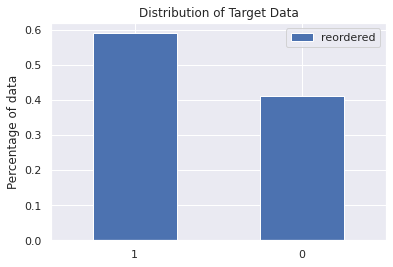

In [ ]:
## Question : Target Variable Distribution ?

sns.set_theme()
ax = (prior_train_orders['reordered'].value_counts()/prior_train_orders.shape[0]).plot.bar()
ax.set_xticklabels(['1','0'], rotation = 0)  # convert it to first time orders and Reorders
ax.set_ylabel("Percentage of data")
ax.set_title('Distribution of Target Data')
ax.legend()

In [ ]:
prior_set = prior_train_orders[prior_train_orders['eval_set']=='prior']
train_set = prior_train_orders[prior_train_orders['eval_set']=='train']

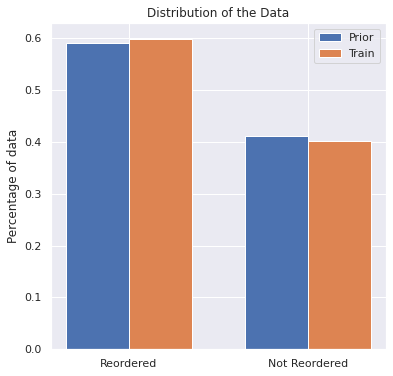

In [ ]:
#plot distribution by percentage

prior_set = prior_set['reordered'].value_counts()/prior_set.shape[0]
train_set = train_set['reordered'].value_counts()/train_set.shape[0]

width = 0.35  
x = np.array([0,1])
fig, ax = plt.subplots(figsize=(6,6))
rects1 = ax.bar(x - width/2, prior_set, width, label='Prior')
rects2 = ax.bar(x + width/2, train_set, width, label='Train')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of data')
ax.set_title('Distribution of the Data')
ax.set_xticks(x)
ax.set_xticklabels(['Reordered','Not Reordered'])
ax.legend()
plt.show()

Analysis :

Distribution is similar in both Prior and Train Set

Around 60% of time product has been reordered

## **Users - How many users**

In [ ]:
print("Total Users :",prior_train_orders['user_id'].nunique())
print("Users in train :",prior_train_orders[prior_train_orders['eval_set']=='train']['user_id'].nunique())
print("Users in test :",orders[orders['eval_set']=='test']['user_id'].nunique())

Total Users : 206209
Users in train : 131209
Users in test : 75000


**Orders - How many orders were placed by every user**

In [ ]:
#Question : How many orders were placed by every user ? 

orders_count = orders.groupby(['user_id'])['order_id'].agg(lambda group: len(group.unique()))\
                .reset_index(name='order_count')\
                .set_index('user_id')

In [ ]:
print("Minimum orders per user :",orders_count['order_count'].min())
print("Maximum orders per user :",orders_count['order_count'].max())

Minimum orders per user : 4
Maximum orders per user : 100


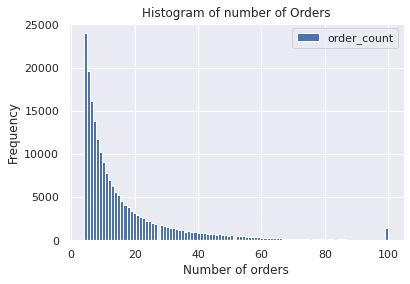

In [ ]:
#plot histogram of orders

ax = orders_count.plot.hist(bins = 100)
ax.set_xlabel("Number of orders")
ax.set_title('Histogram of number of Orders')
ax.legend()

Analysis

For every user we have around 4-100 order details 

# **How many Orders with no reordered products**

In [ ]:
#Ques: How many Orders with no reordered products ?

orders_count = prior_train_orders.groupby(['order_id'])['reordered'].sum().reset_index(name = 'counts')
order_with_reordered_items , order_with_no_reordered_items= sum(orders_count['counts']!=0) , sum(orders_count['counts']==0)

#order_with_reordered_items/ total unique orders
print('Orders with reordered items :',order_with_reordered_items/prior_train_orders['order_id'].nunique())
print('Orders with no reordered items :',order_with_no_reordered_items/prior_train_orders['order_id'].nunique())

Orders with reordered items : 0.8813194412690899
Orders with no reordered items : 0.11868055873091014


Analysis -

12 % of orders have no reordered items, while rest ~88 % of orders contains reordered items

# **Products - Frequently ordered products**

In [ ]:
print("There are total {} different products ".format(prior_train_orders['product_name'].nunique()))

There are total 49685 different products 


In [ ]:
df = prior_train_orders.groupby(['product_name'])['product_name'].size().\
        reset_index(name = 'order_rate').sort_values(by ='order_rate', ascending = False)
df['order_rate'] = df['order_rate']/prior_train_orders['order_id'].nunique()
df.set_index('product_name', inplace = True)
df.round(5)

,order_rate
product_name,
Banana,0.14683
Bag of Organic Bananas,0.11803
Organic Strawberries,0.08236
Organic Baby Spinach,0.07522
Organic Hass Avocado,0.06601
...,...
Greek Blended Cherry Fat Free Yogurt,0.00000
All Natural Stevia Liquid Extract Sweetener,0.00000
"Frittata, Farmer's Market",0.00000


Text(0.5, 1.0, 'Frequently ordered product')

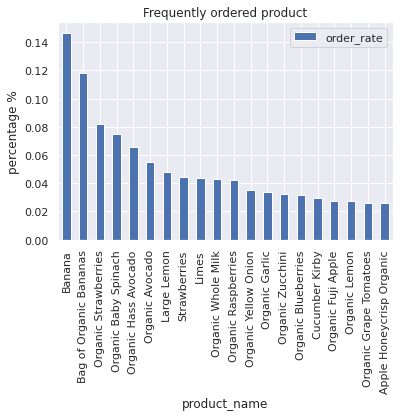

In [ ]:
ax = df[:20].plot.bar()
ax.set_ylabel("percentage %")
ax.set_title('Frequently ordered product')

In [ ]:
# print least frequently ordered product by count

print("Least frequently ordered product ")
print("\n",prior_train_orders['product_name'].value_counts()[-10:])

Least frequently ordered product 

 String Of Pearl White Sprinkles                           1
Organic Aleppo Pepper                                     1
Sloppy Joe Sandwich Makers                                1
Flax Oil, Organic, Omega-3, Original Formula              1
Max White With Polishing Star Soft Toothbrush             1
12 Inch Taper Candle White                                1
Pure Performance Restorative Shampoo Chamomile & Honey    1
Yellow Fish Breading                                      1
Orangemint Flavored Water                                 1
Flatbread Pizza All Natural                               1
Name: product_name, dtype: int64


Analysis

It can be seen that most of the products which are ordered are organic foods / fresh fruits 

Bananas have highest order rate of 0.14.

Least ordered products include Wasabi Cheddar Spreadable Cheese ,Vitamin D Gummies, Escapes Variety Pack etc

**Products - Frequently re-ordered products**

In [ ]:
#ques : Frequently reordered product ?
#percentage - of products reordered

df = prior_train_orders[prior_train_orders['reordered'] ==1].groupby(['product_name'])['product_name'].size().\
        reset_index(name = 'reorder_rate').sort_values(by ='reorder_rate', ascending = False)
df['reorder_rate'] = df['reorder_rate']/prior_train_orders[prior_train_orders['reordered'] ==1]['order_id'].nunique()
df.set_index('product_name', inplace = True)
df.round(5)

,reorder_rate
product_name,
Banana,0.14078
Bag of Organic Bananas,0.11166
Organic Strawberries,0.07272
Organic Baby Spinach,0.06610
Organic Hass Avocado,0.05974
...,...
Raspberry Cheesecake,0.00000
Liquid Vitamin B-Complex Natural Tangerine Flavor,0.00000
Oktoberfest Malt Liquor,0.00000


Text(0.5, 1.0, 'Frequently reordered product')

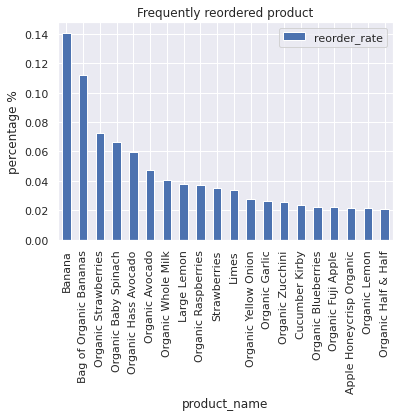

In [ ]:
ax = df[:20].plot.bar()
ax.set_ylabel("percentage %")
ax.set_title('Frequently reordered product')

In [ ]:
#frequently reordered product by count

print("\nLeast frequently reordered product ")
print("\n",prior_train_orders[prior_train_orders['reordered'] ==1]['product_name'].value_counts()[-10:])


Least frequently reordered product 

 38210 Full Jaw Cuticle Nipper                                              1
Black Pearl Liquid Eyeliner                                                1
Original Ultra Concentrated Dish Liquid                                    1
Black Garlic Bulbs                                                         1
Skullcap Extract                                                           1
Biotin 1000 mcg Tablets                                                    1
Hot & Spicy with Beans Chili                                               1
Sweet Gala Apples with Almonds & Sliced Apples with Mild Cheddar Cheese    1
SPF 20 Vanilla Lip Balm                                                    1
Wild Rice, 100% Natural                                                    1
Name: product_name, dtype: int64


Analysis:

It can be seen that most of the products which are reordered are also organic foods / fresh fruits (especially Bananas). Same observation can be concluded fron product order rate above.

Bananas have highest reorder rate of 0.14.

**Aisles - ordered / reordered**

In [ ]:
#aisles

print("There are total {} different aisles ".format(prior_train_orders['aisle'].nunique()))

There are total 134 different aisles 


In [ ]:
!pip install squarify

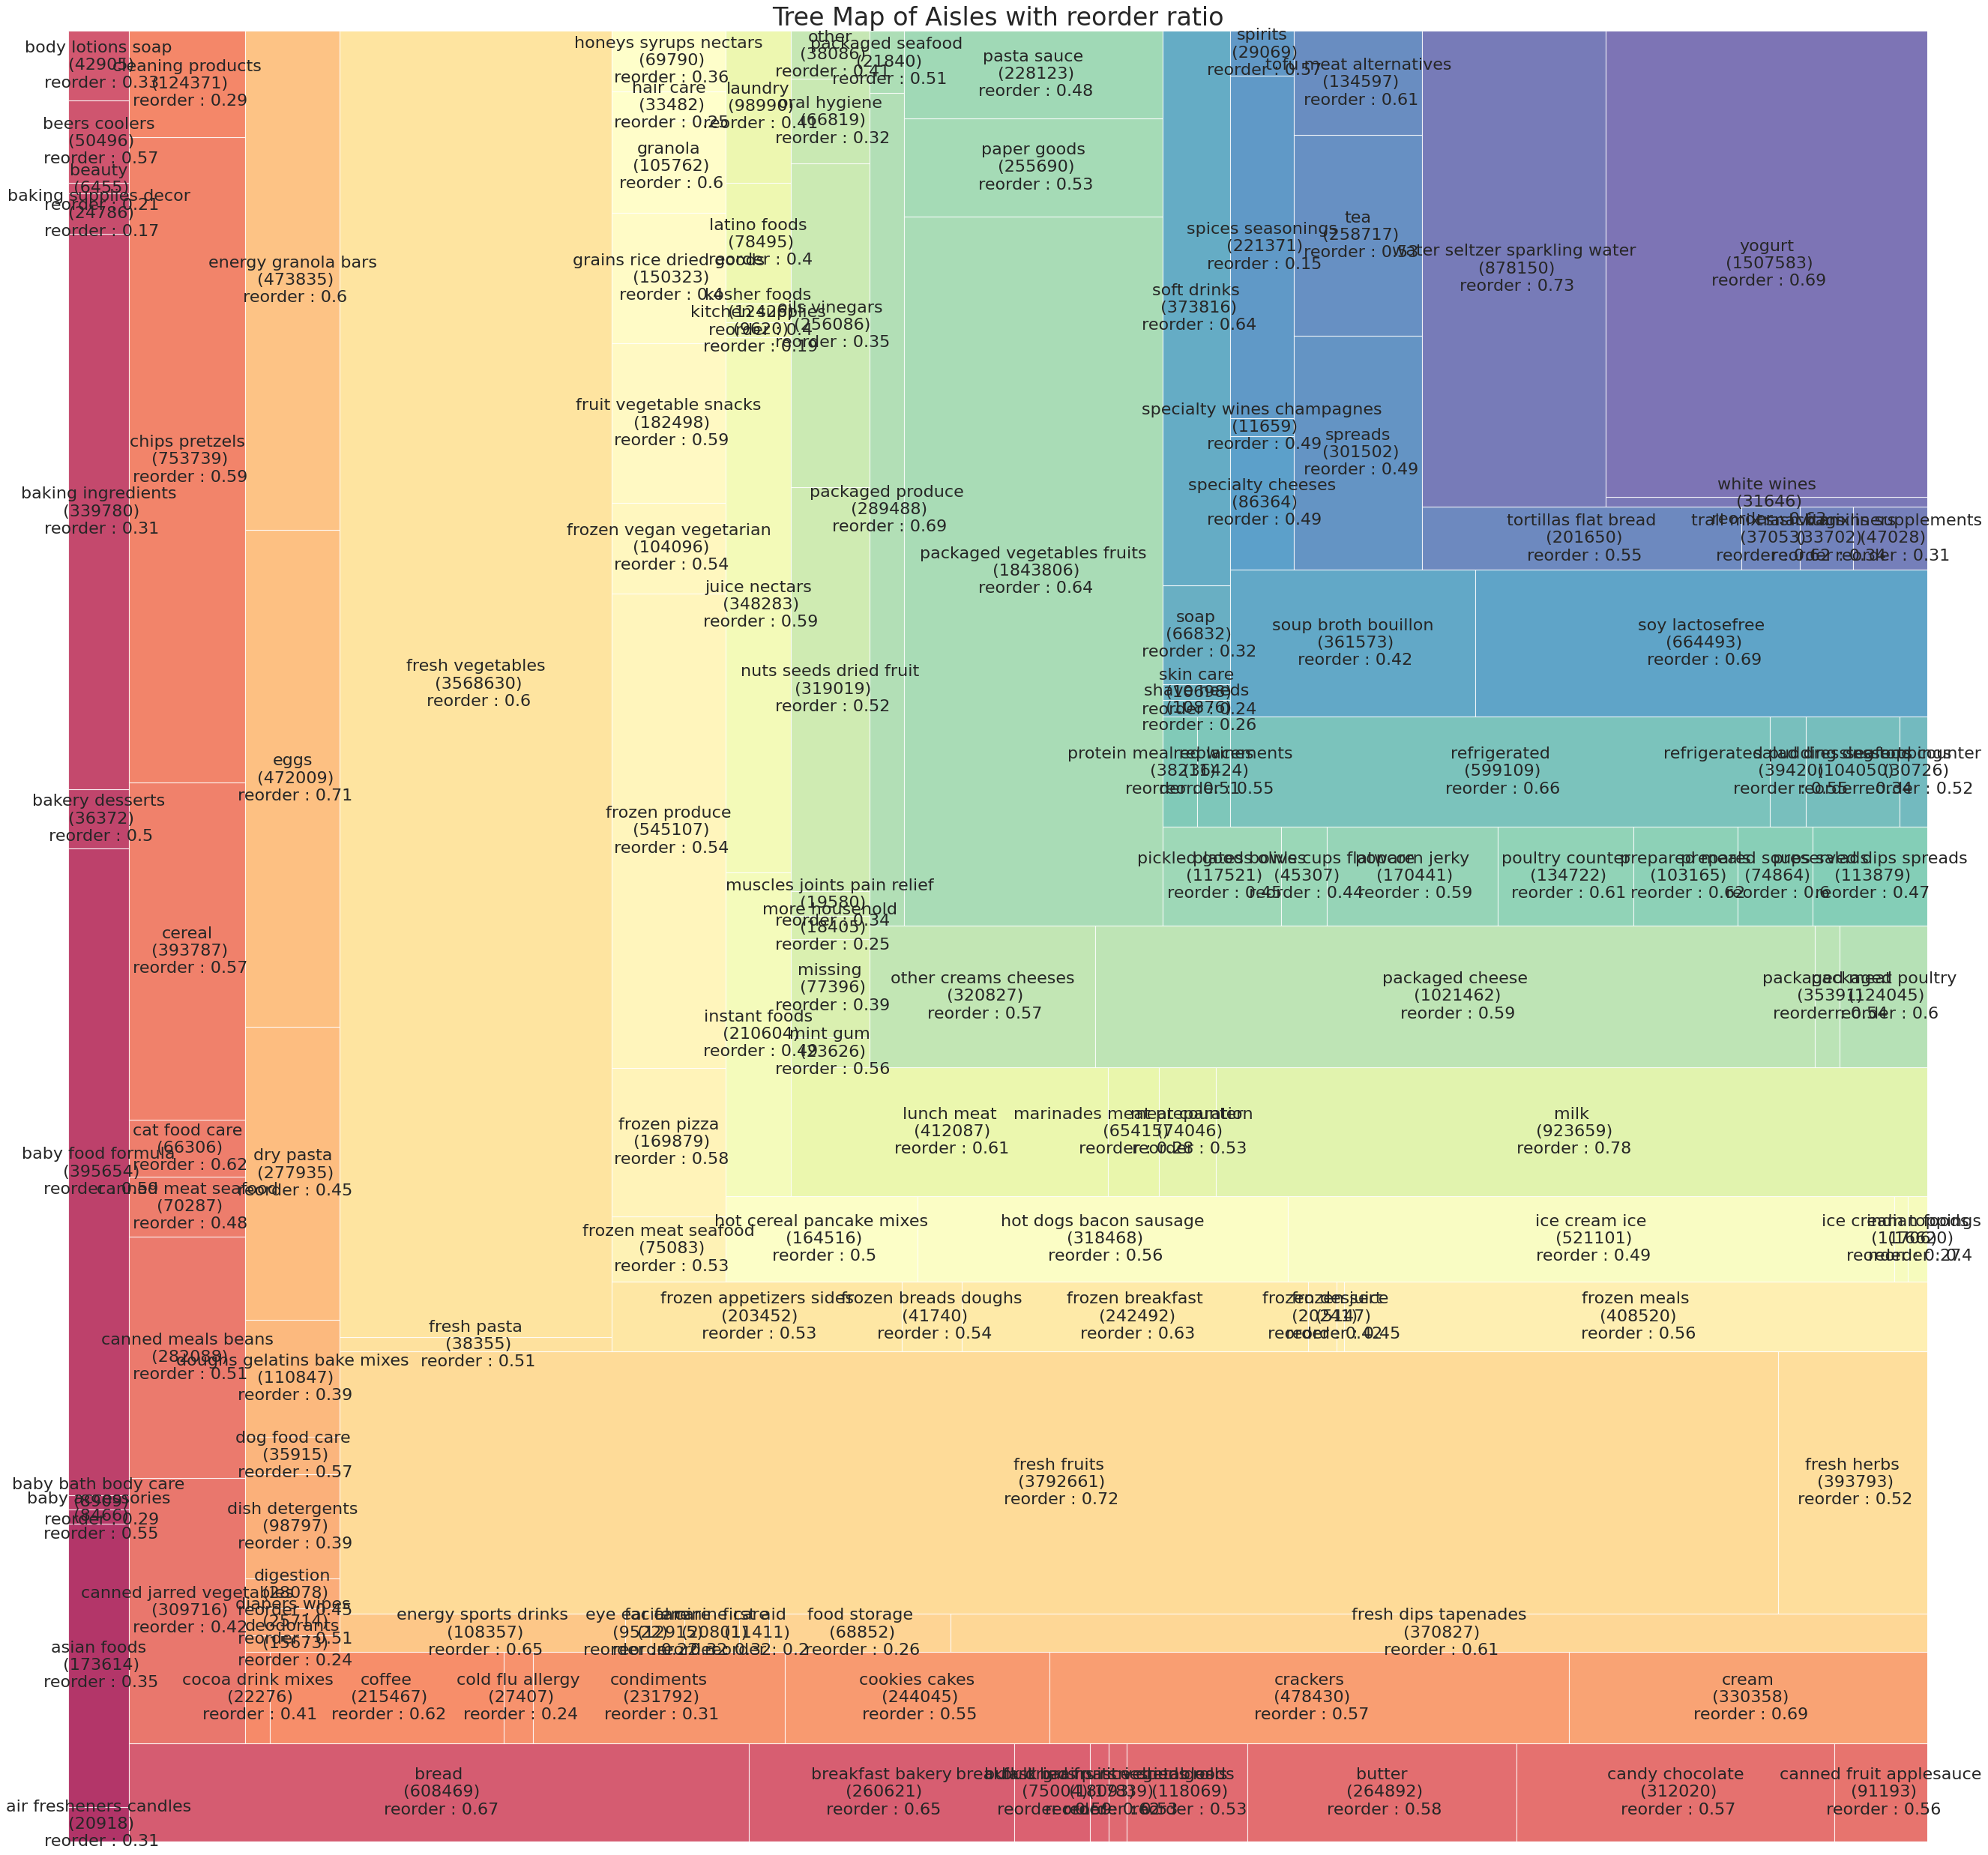

In [ ]:
#plot tree map of aisles showing order_count and reorder rate
# ref: https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

import squarify 

# Prepare Data
df = prior_train_orders.groupby(['aisle']).size().reset_index(name='order_count')
aisle_reorder_rate = prior_train_orders[prior_train_orders['reordered']==1].groupby(['aisle']).size().reset_index(name='reorder_rate')
df['reorder_rate'] = aisle_reorder_rate['reorder_rate']/df['order_count']

labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")" + "\n reorder : "+ str(round(x[2],2)) , axis=1)
sizes = df['order_count'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(40,40), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8, text_kwargs={'fontsize':20})

# Decorate
plt.title('Tree Map of Aisles with reorder ratio', fontsize = 30)
plt.axis('off')
plt.show()

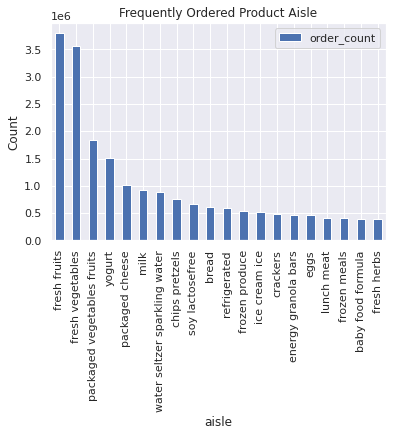

In [ ]:
#plot bar plot of top 20 aisles based on order count

ax = df[['aisle','order_count']].sort_values(by='order_count', ascending = False)[:20].plot.bar(x = 'aisle', y='order_count')
ax.set_ylabel("Count")
ax.set_title('Frequently Ordered Product Aisle')
ax.legend()

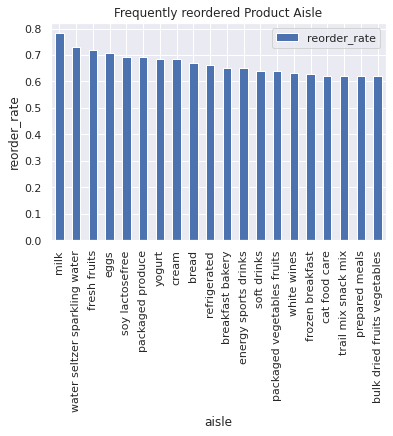

In [ ]:
#plot bar plot of top 20 aisles based on their reorder rate

ax = df[['aisle','reorder_rate']].sort_values(by='reorder_rate', ascending = False)[:20].plot.bar(x = 'aisle', y='reorder_rate')
ax.set_ylabel("reorder_rate")
ax.set_title('Frequently reordered Product Aisle')
ax.legend()

In [ ]:
# get most frequently reordered product from each aisle

df.sort_values(by = 'reorder_rate', axis=0, ascending=False, inplace = True)

print("Most frequently reordered product aisles")
df[:10]

Most frequently reordered product aisles


,aisle,order_count,reorder_rate
83,milk,923659,0.781812
131,water seltzer sparkling water,878150,0.729930
50,fresh fruits,3792661,0.718823
41,eggs,472009,0.706359
119,soy lactosefree,664493,0.692361
96,packaged produce,289488,0.691977
133,yogurt,1507583,0.686501
33,cream,330358,0.685184
11,bread,608469,0.670552
110,refrigerated,599109,0.663006


In [ ]:
#get least frequently reordered product from each aisle

print("Least frequently reordered product aisles")
df[-10:]

Least frequently reordered product aisles


,aisle,order_count,reorder_rate
67,hair care,33482,0.246759
115,skin care,10698,0.242849
34,deodorants,15673,0.238818
29,cold flu allergy,27407,0.235341
44,eye ear care,9522,0.220542
8,beauty,6455,0.212858
47,first aid,11411,0.195864
76,kitchen supplies,9620,0.194802
7,baking supplies decor,24786,0.167595
122,spices seasonings,221371,0.152933


Analysis:

As we can see, most products are ordered from Fresh Fruits and Fresh Vegetables aisles.
Other frequently ordered items are from Yogurt , Packaged Vegetables and packaged cheese aisles.

Least frequently ordered items are from Air fresheners, Baby accessories, Baby bath body care etc. aisles

Milk, sparkling water, fruits, eggs, yogurt are most common aisles the product is reordered from, as they are items which are daily consumed, and one rarely switches from their usual meal plan. Also these are the products that lasts only few days , thus high reorder rate.

**Department - ordered/ reordered**

In [ ]:
#department

print("There are total {} different departments ".format(prior_train_orders['department'].nunique()))

There are total 21 different departments 


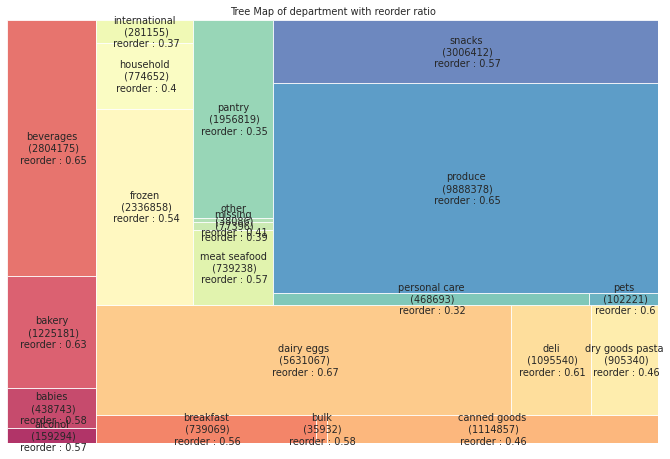

In [ ]:
# get tree map of departments and display their order count and reorder rate
# ref: https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

# Prepare Data
df = prior_train_orders.groupby(['department']).size().reset_index(name='order_count')
dept_reorder_rate = prior_train_orders[prior_train_orders['reordered']==1].groupby(['department']).size().reset_index(name='reorder_rate')
df['reorder_rate'] = dept_reorder_rate['reorder_rate']/df['order_count']

labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")" + "\n reorder : "+ str(round(x[2],2)) , axis=1)
sizes = df['order_count'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 70)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8, text_kwargs={'fontsize':10})

# Decorate
plt.title('Tree Map of department with reorder ratio', fontsize = 10)
plt.axis('off')
plt.show()

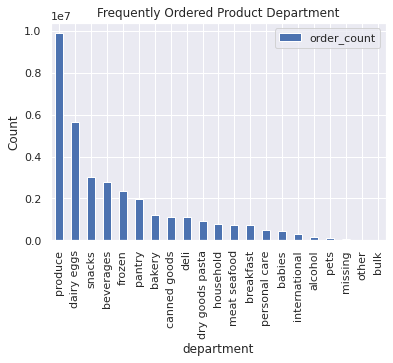

In [ ]:
# plot departments by their order rate

ax = df[['department','order_count']].sort_values(by='order_count', ascending = False).plot.bar(x = 'department', y='order_count')
ax.set_ylabel("Count")
ax.set_title('Frequently Ordered Product Department')
ax.legend()

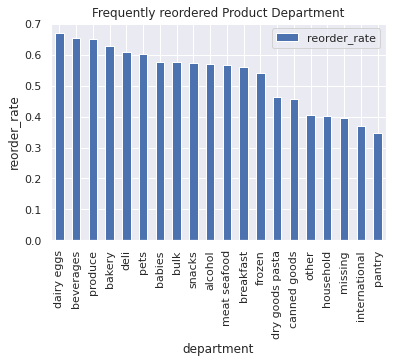

In [ ]:
#plot bar plot of top 20 Department based on their reorder rate

ax = df[['department','reorder_rate']].sort_values(by='reorder_rate', ascending = False)[:20].plot.bar(x = 'department', y='reorder_rate')
ax.set_ylabel("reorder_rate")
ax.set_title('Frequently reordered Product Department')
ax.legend()

In [ ]:
# get most frequently reordered product from each department

df.sort_values(by = 'reorder_rate', axis=0, ascending=False, inplace = True)

print("Most frequently reordered product departments")
df[:5]

Most frequently reordered product departments


,department,order_count,reorder_rate
7,dairy eggs,5631067,0.670161
3,beverages,2804175,0.653651
19,produce,9888378,0.650521
2,bakery,1225181,0.628381
8,deli,1095540,0.608130


In [ ]:
#get least frequently reordered product from each department

print("Least frequently reordered product aisles")
df[-5:]

Least frequently reordered product aisles


,department,order_count,reorder_rate
11,household,774652,0.403339
14,missing,77396,0.394323
12,international,281155,0.369682
16,pantry,1956819,0.347400
17,personal care,468693,0.321863


In [ ]:
depts_aisles = prior_train_orders.groupby(['department'])['aisle'].agg(lambda group: group.unique().tolist())\
                .reset_index(name = 'aisles')

In [ ]:
dairy_eggs = depts_aisles.loc[depts_aisles['department']=='dairy eggs']['aisles'].tolist()
beverages = depts_aisles.loc[depts_aisles['department']=='beverages']['aisles'].tolist()
produce = depts_aisles.loc[depts_aisles['department']=='produce']['aisles'].tolist()
personal_care = depts_aisles.loc[depts_aisles['department']=='personal care']['aisles'].tolist()

In [ ]:
dairy_eggs

[['yogurt',
  'packaged cheese',
  'other creams cheeses',
  'eggs',
  'soy lactosefree',
  'milk',
  'cream',
  'butter',
  'refrigerated pudding desserts',
  'specialty cheeses']]

In [ ]:
beverages

[['energy sports drinks',
  'refrigerated',
  'water seltzer sparkling water',
  'juice nectars',
  'soft drinks',
  'coffee',
  'tea',
  'cocoa drink mixes']]

In [ ]:
produce

[['fresh vegetables',
  'fresh fruits',
  'packaged vegetables fruits',
  'packaged produce',
  'fresh herbs']]

In [ ]:
personal_care

[['cold flu allergy',
  'body lotions soap',
  'soap',
  'oral hygiene',
  'muscles joints pain relief',
  'hair care',
  'beauty',
  'deodorants',
  'facial care',
  'feminine care',
  'vitamins supplements',
  'digestion',
  'protein meal replacements',
  'shave needs',
  'first aid',
  'eye ear care',
  'skin care']]

Analysis

As seen from departments analysis , most ordered products are from produce department which have fresh vegetables, fruits, herbs etc. But most reordered product department is dairy eggs having yogurt, milk, eegs, cheese etc

We see high reorder rate in organic foods and daily consumed items.

Low reorder rate in personal care departments.

**Combining products , departments, aisles to see which product from which aisle and department was frequently reordered**

In [ ]:
#
#reorder_rate = #times product been reordered / #times product was ordered

df = pd.DataFrame({'reorder_rate': prior_train_orders.groupby(['product_name','aisle','department','reordered'])['reordered'].\
                                                       count().groupby(level=0).\
                                                       apply(lambda x: x / float(x.sum()))}).reset_index()
df_reorder = df[df['reordered']==1].drop(['reordered'], axis =1)
df_reorder.sort_values(by = 'reorder_rate', ascending = False, inplace = True)

df_reorder

,product_name,aisle,department,reorder_rate
71716,Raw Veggie Wrappers,prepared meals,deli,0.942029
76468,Serenity Ultimate Extrema Overnight Pads,feminine care,personal care,0.933333
54354,Orange Energy Shots,energy sports drinks,beverages,0.923077
16298,Chocolate Love Bar,candy chocolate,snacks,0.921569
80019,Soy Powder Infant Formula,baby food formula,babies,0.914286
...,...,...,...,...
3855,"Allspice, Ground, Organic",spices seasonings,pantry,0.012821
56117,Organic Chinese Five Spice,spices seasonings,pantry,0.011236
62303,Organic Whole Nutmeg,spices seasonings,pantry,0.009434
55845,Organic Caraway Seeds,spices seasonings,pantry,0.007042


Analysis:

We can see the products with high reorder rate are prepared meals, feminine care, sports drinks, baby food etc.

These products doesnt have high order rate , but they do have high reorder rate , probably because people doesnt change their preferences for some products over time.

Panty items have very low reorder rate. Products include spices, Nutmeg , organic caraway seeds etc. We can assume that people switched their preferences on these products or they dont use these anymore.

**Add to cart Order**

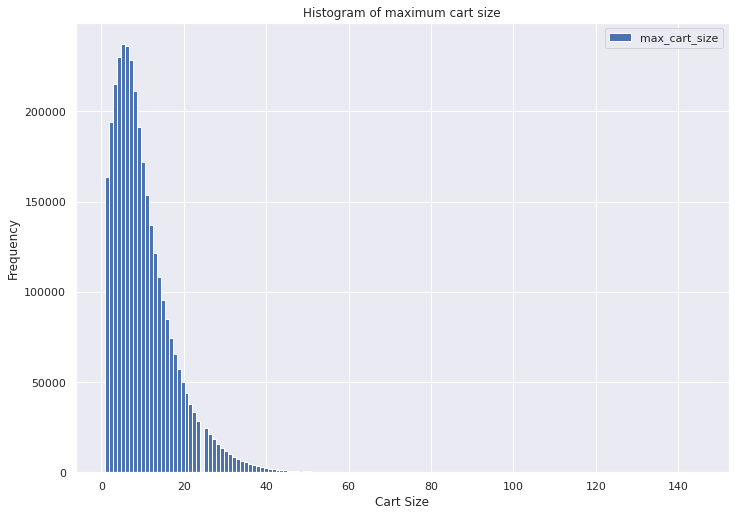

In [ ]:
#plot histogram of maximum cart size  - > which is generated by add to cart order 

sns.set(rc={'figure.figsize':(11.7,8.27)})
max_cart_size = prior_train_orders.groupby(['order_id'])['add_to_cart_order'].aggregate(np.max)\
                                                            .reset_index(name = 'max_cart_size')
ax = max_cart_size['max_cart_size'].plot.hist(bins = 150, color = 'b')
ax.set_xlabel("Cart Size")
ax.set_title('Histogram of maximum cart size')
ax.legend()

In [ ]:
max_cart_size['max_cart_size'].value_counts()[:1]

5    237225
Name: max_cart_size, dtype: int64

Analysis:

We have a right skewed distribution of maximum cart size for every order, with mode = 5. There are very few order with cart size > 40 and all the way up to 145.

Before treating values here as an outlier, we need to account below facts.

add_to_cart_order represents the order the product in the cart.

we can get many minute relationships between product and user based on their purchases.

as we need to get reorder probabilities for every product that user ordered, discarding data shouldn't be an option

**Day of week**

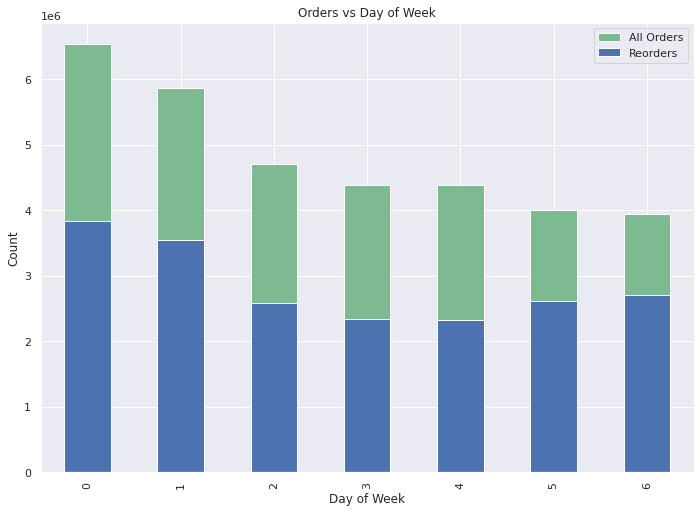

In [ ]:
# how many products were ordered and reordered on a particular day of week

sns.set_theme(context='notebook', style='darkgrid', palette="crest")
ax = prior_train_orders['order_dow'].value_counts().plot.bar()
ax = prior_train_orders[prior_train_orders['reordered']==1].groupby(['order_dow']).size().plot.bar(color = 'b')
ax.set_xlabel("Day of Week")
ax.set_ylabel("Count")
ax.set_title('Orders vs Day of Week')
ax.legend(["All Orders", "Reorders"])

Analysis

Assuming that the week starts from Sunday, most shopping is done on Sundays and Mondays. Also least orders were placed on thursday. People tend to restock there supplies on sundays.

Reorders w.r.t to days of week is proportionally same as all orders.

**Hour of Day**

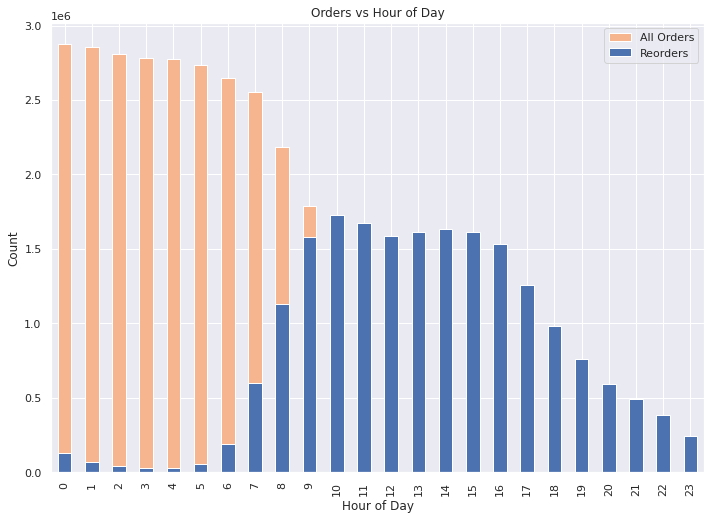

In [ ]:
#how many products were ordered and reordered on a particular hour of day

sns.set_theme(context='notebook', style='darkgrid', palette="rocket_r")
ax = prior_train_orders['order_hour_of_day'].value_counts().plot.bar()
ax = prior_train_orders[prior_train_orders['reordered']==1].groupby(['order_hour_of_day']).size().plot.bar(color = 'b')
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Count")
ax.set_title('Orders vs Hour of Day')
ax.legend(["All Orders", "Reorders"])

**Days since prior order**

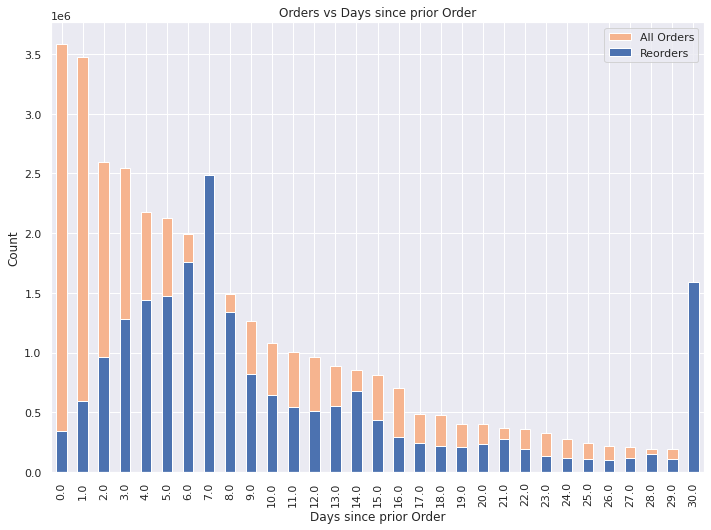

In [ ]:
# After how mamy days user ordered / reordered a product

sns.set_theme(context='notebook', style='darkgrid', palette="rocket_r")
ax = prior_train_orders['days_since_prior_order'].value_counts().plot.bar()
ax = prior_train_orders[prior_train_orders['reordered']==1].groupby(['days_since_prior_order']).size().plot.bar(color = 'b')
ax.set_xlabel("Days since prior Order")
ax.set_ylabel("Count")
ax.set_title('Orders vs Days since prior Order')
ax.legend(["All Orders", "Reorders"])

Analysis of weekly buyers and monthly buyers

Frequently brought product by weekly buyers

Text(0.5, 1.0, 'Frequently reordered product by weekly buyers')

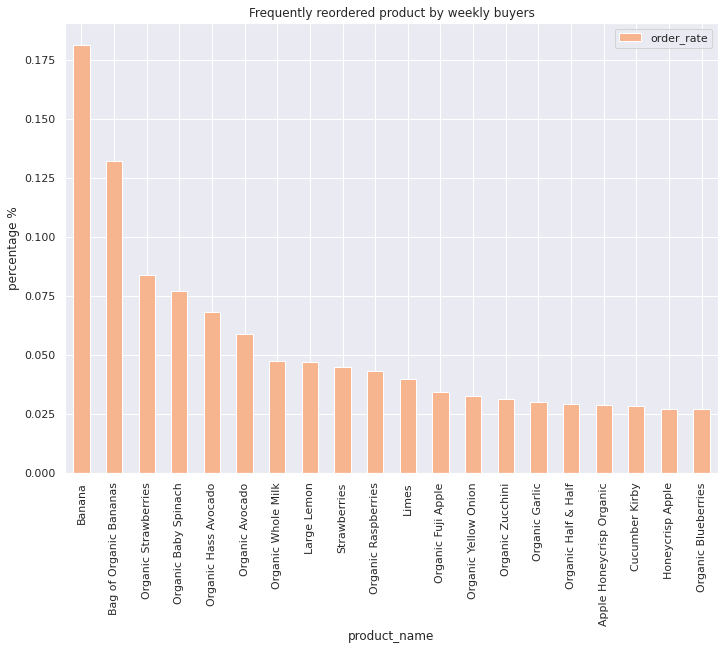

In [ ]:
df = prior_train_orders[(prior_train_orders['days_since_prior_order']==7.0) & (prior_train_orders['reordered']==1.0)].groupby('product_name')['product_name'].size().\
            reset_index(name = 'order_rate').sort_values(by = 'order_rate', ascending = False)
df['order_rate'] = df['order_rate']/ prior_train_orders[(prior_train_orders['days_since_prior_order']==7.0) & (prior_train_orders['reordered']==1.0)]['order_id'].nunique()
df.set_index('product_name', inplace = True)

#top 20 frequently reordered product
ax = df[:20].plot.bar()
ax.set_ylabel("percentage %")
ax.set_title('Frequently reordered product by weekly buyers')

In [ ]:
df[:20]

,order_rate
product_name,
Banana,0.181724
Bag of Organic Bananas,0.132152
Organic Strawberries,0.083824
Organic Baby Spinach,0.077275
Organic Hass Avocado,0.068253
Organic Avocado,0.058786
Organic Whole Milk,0.047242
Large Lemon,0.047144
Strawberries,0.044832


Text(0.5, 1.0, 'Frequently reordered product by monthly buyers')

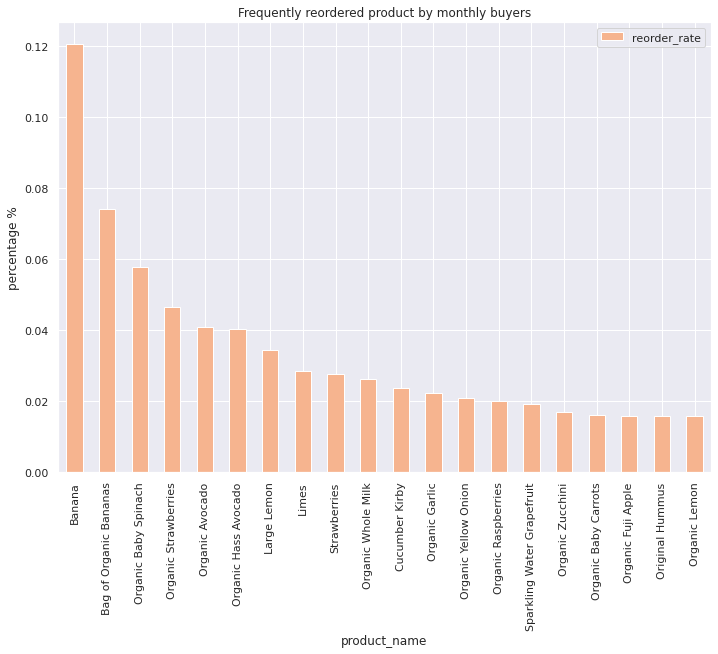

In [ ]:
df = prior_train_orders[(prior_train_orders['days_since_prior_order']==30.0) & (prior_train_orders['reordered']==1.0)].\
        groupby('product_name')['product_name'].size().\
        reset_index(name = 'reorder_rate').sort_values(by = 'reorder_rate', ascending = False)
df['reorder_rate'] = df['reorder_rate']/prior_train_orders[(prior_train_orders['days_since_prior_order']==30.0) & (prior_train_orders['reordered']==1)]\
                    ['order_id'].nunique()
df.set_index('product_name', inplace = True)

#top 20 frequently reordered product
ax = df[:20].plot.bar()
ax.set_ylabel("percentage %")
ax.set_title('Frequently reordered product by monthly buyers')

In [ ]:
df[:20]

,reorder_rate
product_name,
Banana,0.120750
Bag of Organic Bananas,0.074116
Organic Baby Spinach,0.057675
Organic Strawberries,0.046598
Organic Avocado,0.040948
Organic Hass Avocado,0.040223
Large Lemon,0.034213
Limes,0.028454
Strawberries,0.027699


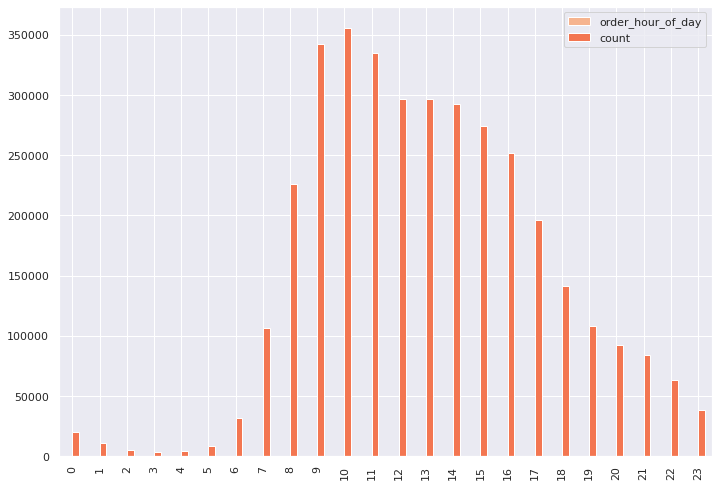

In [ ]:
prior_train_orders[(prior_train_orders['days_since_prior_order']==7.0)].\
    groupby('order_hour_of_day')['order_hour_of_day'].count().\
    reset_index(name = 'count').plot.bar()

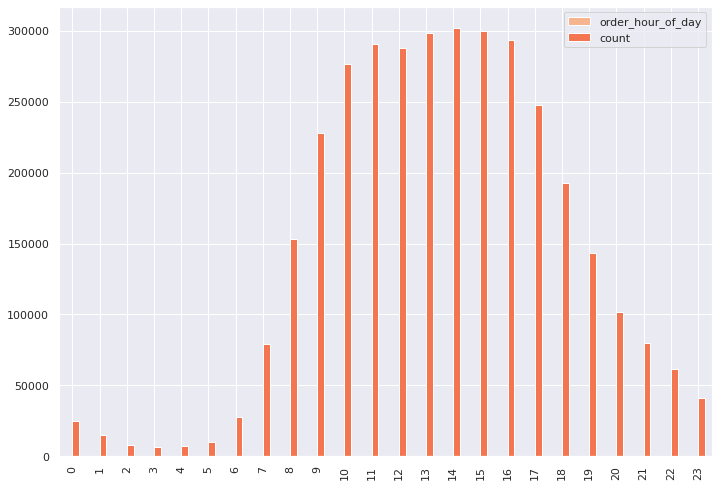

In [ ]:
prior_train_orders[(prior_train_orders['days_since_prior_order']==30.0)].\
    groupby('order_hour_of_day')['order_hour_of_day'].count().\
    reset_index(name = 'count').plot.bar()

Analysis:

Weekly/monthly buyer's time of purchase ,is similar to the normal purchase time pattern, which can be seen from plot (4.1.11) Hour of Day

### **Bivariate Analysis**

How day of week and hour of day impact product order/reorder

In [ ]:
order_day = prior_train_orders.groupby(['order_dow'])['order_id'].count().reset_index(name = 'count')

In [ ]:
#ques : how many products were reordered per day?

reorder_day = prior_train_orders[prior_train_orders['reordered']==1].groupby(['order_dow','order_hour_of_day'])['order_id'].count().reset_index(name = 'reorder_rate')
reorder_day = pd.merge(reorder_day, order_day, on = 'order_dow', how = 'left')
reorder_day['reorder_rate'] = reorder_day['reorder_rate']/reorder_day['count']
reorder_day.drop('count', axis = 1, inplace = True)
reorder_day = reorder_day.pivot('order_dow','order_hour_of_day','reorder_rate')
reorder_day = pd.DataFrame(reorder_day.to_records())
reorder_day.set_index("order_dow", inplace = True)
reorder_day

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,,,,
0,0.003569,0.002003,0.001152,0.000816,0.000734,0.001113,0.003477,0.013783,0.030964,0.043079,0.049074,0.049980,0.049616,0.051980,0.052577,0.051500,0.046587,0.036508,0.026347,0.020451,0.017612,0.015058,0.011650,0.006853
1,0.003876,0.001901,0.001056,0.000716,0.000806,0.001594,0.006162,0.019530,0.038739,0.057807,0.060637,0.054517,0.048405,0.047676,0.047370,0.045620,0.042959,0.034735,0.026416,0.020138,0.015485,0.012374,0.009331,0.005821
2,0.003996,0.001952,0.001122,0.000971,0.000924,0.001850,0.006600,0.018659,0.033406,0.048240,0.051230,0.049132,0.045331,0.046056,0.046363,0.046002,0.045726,0.037919,0.030994,0.023377,0.017665,0.014161,0.010909,0.007136
3,0.003951,0.001902,0.001238,0.000838,0.000988,0.001856,0.006713,0.018484,0.032076,0.044174,0.048326,0.047311,0.044449,0.045616,0.045376,0.047450,0.046031,0.039393,0.032025,0.024665,0.018410,0.015161,0.012387,0.007467
4,0.003636,0.001956,0.001167,0.000939,0.001064,0.001935,0.006760,0.019075,0.031919,0.043312,0.047918,0.046579,0.044294,0.045310,0.045854,0.046413,0.045973,0.039467,0.032050,0.025993,0.020395,0.017036,0.013853,0.008225
5,0.003866,0.002017,0.001265,0.001085,0.001246,0.002161,0.006926,0.019394,0.033038,0.046145,0.050903,0.049886,0.046430,0.047044,0.048975,0.048571,0.046317,0.037880,0.029896,0.022780,0.017518,0.014026,0.011095,0.007436
6,0.003895,0.002295,0.001408,0.000962,0.000999,0.001416,0.004487,0.016525,0.032950,0.042143,0.046748,0.047336,0.046944,0.047479,0.049617,0.047506,0.044149,0.036237,0.028780,0.021727,0.016806,0.014701,0.012001,0.008133


Products vs hour of the day / day of week

Frequently brought product on any hour/day

In [ ]:
#get row with maximum value after groupby
#ref:https://stackoverflow.com/a/15705958/11533069

x = prior_train_orders.groupby(['order_dow','order_hour_of_day','product_name'])['product_name'].size().reset_index(name = 'count')
idx = x.groupby(['order_dow','order_hour_of_day'], sort=False)['count'].transform(max) == x['count']
x = x[idx].drop_duplicates(subset=['order_dow','order_hour_of_day'], keep='first')
x = x.pivot(index = 'order_dow',columns = 'order_hour_of_day',values = 'product_name')
x

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,,,,
0,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana
1,Bag of Organic Bananas,Banana,Banana,Bag of Organic Bananas,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana
2,Bag of Organic Bananas,Bag of Organic Bananas,Bag of Organic Bananas,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana
3,Bag of Organic Bananas,Bag of Organic Bananas,Bag of Organic Bananas,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Bag of Organic Bananas
4,Bag of Organic Bananas,Bag of Organic Bananas,Banana,Bag of Organic Bananas,Bag of Organic Bananas,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana
5,Banana,Bag of Organic Bananas,Bag of Organic Bananas,Bag of Organic Bananas,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana
6,Banana,Banana,Bag of Organic Bananas,Banana,Bag of Organic Bananas,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana


Analysis:

we can see that on any day - any hour most frequently ordered product is Banana and Bag of organic bananas

**aisles vs hour of the day vs day of week**

In [ ]:
#ques : most frequently ordered product aisle by hour ?

#get row with maximum value after groupby
#ref:https://stackoverflow.com/a/15705958/11533069

x = prior_train_orders.groupby(['order_dow','order_hour_of_day','aisle'])['aisle'].size().reset_index(name = 'count')
idx = x.groupby(['order_dow','order_hour_of_day'], sort=False)['count'].transform(max) == x['count']
x = x[idx].drop_duplicates(subset=['order_dow','order_hour_of_day'], keep='first')
x = x.pivot(index = 'order_dow',columns = 'order_hour_of_day',values = 'aisle')
x

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,,,,
0,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh fruits,fresh fruits,fresh fruits,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits
1,fresh fruits,fresh vegetables,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits
2,fresh fruits,fresh vegetables,fresh vegetables,fresh vegetables,fresh fruits,fresh vegetables,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits
3,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits
4,fresh vegetables,fresh vegetables,fresh vegetables,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh vegetables
5,fresh vegetables,fresh vegetables,fresh fruits,fresh vegetables,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh vegetables,fresh vegetables
6,fresh vegetables,fresh vegetables,fresh fruits,fresh vegetables,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh fruits,fresh vegetables,fresh fruits,fresh vegetables,fresh vegetables,fresh vegetables


**department vs hour of the day vs day of week**

In [ ]:
# department vs hour of the day

#ques : most frequently ordered product department by hour ?

#get row with maximum value after groupby
#ref:https://stackoverflow.com/a/15705958/11533069

x = prior_train_orders.groupby(['order_dow','order_hour_of_day','department'])['department'].size().reset_index(name = 'count')
idx = x.groupby(['order_dow','order_hour_of_day'], sort=False)['count'].transform(max) == x['count']
x = x[idx].drop_duplicates(subset=['order_dow','order_hour_of_day'], keep='first')
x = x.pivot(index = 'order_dow',columns = 'order_hour_of_day',values = 'department')
x

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,,,,
0,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce
1,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce
2,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce
3,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce
4,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce
5,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce
6,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce


Analysis:

It can be seen that most frequently bought product on any given day at any time is Bananas

Most frequently shopped aisle on any given day at any time is Fresh fruits and Fresh vegetables

Most frequently shopped department on any given day at any time is produce

## **Feature Extraction**

## **Feature Extraction**

In [ ]:
#loading libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gc


#overriding default setting of pandas
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
#prior_train_orders = pd.concat([prior_order, train_order]).sort_values(by=['order_id'])

#Merge all files together
prior_orders_data = prior_order.sort_values(by=['order_id'])
prior_orders_data = pd.merge(left = prior_orders_data, right = products,
                             left_on='product_id', right_on='product_id').sort_values(by=['order_id']).reset_index(drop=True)
prior_orders_data = pd.merge(left = prior_orders_data, right = aisles,
                             left_on='aisle_id', right_on='aisle_id').sort_values(by=['order_id']).reset_index(drop=True)
prior_orders_data = pd.merge(left = prior_orders_data, right = departments,
                             left_on='department_id', right_on='department_id').sort_values(by=['order_id']).reset_index(drop=True)
prior_orders_data = pd.merge(left = prior_orders_data, right = orders,
                             left_on='order_id', right_on='order_id').sort_values(by=['order_id']).reset_index(drop=True)

col_order = ['user_id',
 'order_id',
 'product_id',
  'aisle_id',
 'department_id',
 'add_to_cart_order',
 'reordered',
 'product_name',
 'aisle',
 'department',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

prior_orders_data = prior_orders_data[col_order]
print("Shape of prior_orders_data :", prior_orders_data.shape)
prior_orders_data.head()

Shape of prior_orders_data : (32434489, 15)


,user_id,order_id,product_id,aisle_id,department_id,add_to_cart_order,reordered,product_name,aisle,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,202279,2,33120,86,16,1,1,Organic Egg Whites,eggs,dairy eggs,prior,3,5,9,8.0
1,202279,2,1819,88,13,8,1,All Natural No Stir Creamy Almond Butter,spreads,pantry,prior,3,5,9,8.0
2,202279,2,45918,19,13,4,1,Coconut Butter,oils vinegars,pantry,prior,3,5,9,8.0
3,202279,2,9327,104,13,3,0,Garlic Powder,spices seasonings,pantry,prior,3,5,9,8.0
4,202279,2,17794,83,4,6,1,Carrots,fresh vegetables,produce,prior,3,5,9,8.0


In [ ]:
#Merge all files together

prior_orders_data = pd.concat([prior_order, train_order]).sort_values(by=['order_id'])
prior_orders_data = pd.merge(left = prior_orders_data, right = products,
                            left_on='product_id', right_on='product_id').sort_values(by=['order_id']).reset_index(drop=True)
prior_orders_data = pd.merge(left = prior_orders_data, right = aisles,
                            left_on='aisle_id', right_on='aisle_id').sort_values(by=['order_id']).reset_index(drop=True)
prior_orders_data = pd.merge(left = prior_orders_data, right = departments,
                        left_on='department_id', right_on='department_id').sort_values(by=['order_id']).reset_index(drop=True)
prior_orders_data = pd.merge(left = prior_orders_data, right = orders,
                             left_on='order_id', right_on='order_id').sort_values(by=['order_id']).reset_index(drop=True)

prior_orders_data.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs,112108,train,4,4,10,9.0
1,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0
2,1,13176,6,0,Bag of Organic Bananas,24,4,fresh fruits,produce,112108,train,4,4,10,9.0
3,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods,112108,train,4,4,10,9.0
4,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0


In [ ]:
prior_orders_data.groupby(["user_id","product_id"]).size().shape[0]/prior_orders_data.shape[0]

0.40993827571905656

Preprocessing Strategy

In [ ]:
##checking what's the most common word in products

from collections import Counter 
x = products.product_name.values.tolist()
x = " ".join(x).split()
Counter(x).most_common()

[('&', 5203),
 ('Organic', 4903),
 ('Chocolate', 2401),
 ('Cheese', 1990),
 ('Free', 1819),
 ('Chicken', 1494),
 ('Original', 1436),
 ('with', 1432),
 ('Cream', 1241),
 ('Sauce', 1190),
 ('Yogurt', 1123),
 ('Mix', 1104),
 ('Natural', 1096),
 ('Milk', 1067),
 ('Whole', 1064),
 ('Tea', 1061),
 ('Vanilla', 1041),
 ('Butter', 1025),
 ('White', 1011),
 ('Fruit', 979),
 ('Rice', 967),
 ('Bar', 948),
 ('Juice', 928),
 ('Food', 910),
 ('Oil', 863),
 ('Coconut', 819),
 ('Sweet', 805),
 ('With', 804),
 ('Coffee', 785),
 ('Dark', 770),
 ('and', 761),
 ('Chips', 758),
 ('Fresh', 739),
 ('Strawberry', 720),
 ('Gluten', 717),
 ('Apple', 709),
 ('Green', 706),
 ('Lemon', 692),
 ('100%', 691),
 ('Salt', 667),
 ('Cheddar', 667),
 ('Style', 663),
 ('Black', 661),
 ('Ice', 643),
 ('Honey', 638),
 ('Water', 636),
 ('Roasted', 621),
 ('Soup', 618),
 ('Baby', 617),
 ('Almond', 613),
 ('Flavor', 610),
 ('Red', 600),
 ('Bread', 598),
 ('Fat', 587),
 ('Beef', 584),
 ('Liquid', 579),
 ('Garlic', 578),
 ('Pasta'

seems organic products are more here , also products whith chocoloate and cheese

Product Based Features

In [ ]:
def generate_product_features(prior_data = None):
    
    """
    Generate Product based features and return it as dataframe object.
    Later this dataframe will be merged with other dataframe to generate training data
    
    Features:
    feat_1 : product_reorder_rate       : How Frequently the product was reordered ?
    feat_2 : avg_pos_incart             : Average position of product in the cart ?
    
    next 3 values are calculated based product being 
        - organic, 
        - isYogurt - aisle
        - produce  - department
        - isFrozen  - department 
        - isdairy  - department
        - isbreakfast  - department 
        - issnack  - department
        - isbeverage  - department
    these values are then reduced to 3 columns using Non-Negative Matrix Factorization, to reduce sparsity
        
    feat_3 : p_reduced_feat_1             : column 1 from NMF output
    feat_4 : p_reduced_feat_2             : column 2 from NMF output
    feat_5 : p_reduced_feat_3             : column 3 from NMF output
    feat_6 : aisle_reorder_rate           : How frequently a product is reordered from the aisle to which this product belongs
    feat_7 : department_reorder_rate      : How frequently a product is reordered from the department to which this product belongs
    
    
    """
    
    #create an empty dataframe
    product_features = pd.DataFrame(columns=['product_id'])
    
    #add product_name
    product_features['product_id'] = prior_data['product_id'].sort_values().unique()
    
    #get reorder_rate for each product
    #reorder_rate = reorders / total orders
    df = pd.DataFrame({'reorder_rate': prior_data.groupby(['product_id','reordered'])['reordered'].\
                                                       count().groupby(level=0).\
                                                       apply(lambda x: x / float(x.sum()))}).reset_index()

    #get data of reordered products only
    new_df = df[df['reordered']==1]
    new_df['reorder_rate'] = new_df['reorder_rate'] * new_df['reordered']
    
    #handling for products which were never reordered, hence reorder_rate = 0.0
    new_df_1 = df[(df['reordered']==0) & (df['reorder_rate']==float(1.0))]
    new_df_1['reorder_rate'] = new_df_1['reorder_rate'] * new_df_1['reordered']
    new_df = new_df.append(new_df_1)
    
    #drop other columns of the new_df and sort values by product name to align with product features dataframe
    new_df.drop('reordered', axis = 1, inplace = True)
    new_df.sort_values(by='product_id', inplace =  True)   
    new_df = new_df.reset_index(drop = True)
    
    #add to feat_1 of product_features dataframe
    product_features['product_reorder_rate'] = new_df['reorder_rate']
    
    #get mean position of product in the cart, sort by product_name and add to feat_2 of product_features
    mean_position = prior_data.groupby('product_id')['add_to_cart_order'].mean().reset_index(name = 'mean_position')
    mean_position.sort_values(by = 'product_id', inplace = True)
    product_features['avg_pos_incart'] = mean_position['mean_position']
    
    
    
    #generate boolean values if product belongs to below categories
    products['organic'] = products['product_name'].apply(lambda x: 'organic' in x.lower()).astype(int)
    products['isYogurt'] = products['aisle_id'].apply(lambda x: x==120).astype(int)

    products['isProduce'] = products['department_id'].apply(lambda x: x==4).astype(int)
    products['isFrozen'] = products['department_id'].apply(lambda x: x==1).astype(int)
    products['isdairy'] = products['department_id'].apply(lambda x: x==16).astype(int)
    products['isbreakfast'] = products['department_id'].apply(lambda x: x==14).astype(int)
    products['issnack'] = products['department_id'].apply(lambda x: x==19).astype(int)
    products['isbeverage'] = products['department_id'].apply(lambda x: x==7).astype(int)

    new_product_feat = products[['organic', 'isYogurt', 'isProduce', 'isFrozen', 'isdairy', 'isbreakfast', 'issnack', 'isbeverage']]
    
    #reduce sparsity using NMF
    #ref:https://www.kaggle.com/themissingsock/matrix-decomposition-with-buyer-data
    from sklearn.decomposition import NMF
    from sklearn.preprocessing import normalize

    nmf = NMF(n_components = 3)
    model = nmf.fit(new_product_feat)
    W = model.transform(new_product_feat)
    prod_data = pd.DataFrame(normalize(W))

    prod_data.columns = ['p_reduced_feat_1', 'p_reduced_feat_2','p_reduced_feat_3']
    products.drop(['organic', 'isYogurt', 'isProduce', 'isFrozen', 'isdairy', 'isbreakfast', 'issnack', 'isbeverage'], axis = 1, inplace =True)

    product_features['p_reduced_feat_1'] = prod_data['p_reduced_feat_1']
    product_features['p_reduced_feat_2'] = prod_data['p_reduced_feat_2']
    product_features['p_reduced_feat_3'] = prod_data['p_reduced_feat_3']
    

    #Get aisle reorder rate
    df = prior_data.groupby(['aisle']).size().reset_index(name='order_count')
    aisle_reorder_rate = prior_data[prior_data['reordered']==1].groupby(['aisle']).size().reset_index(name='reorder_rate')
    df['aisle_reorder_rate'] = aisle_reorder_rate['reorder_rate']/df['order_count']
    df.drop(['order_count'], axis = 1, inplace = True)
    new_df = pd.merge(prior_data, df, on = 'aisle')
    
    
    #Get dept reorder rate
    df = prior_data.groupby(['department']).size().reset_index(name='order_count')
    aisle_reorder_rate = prior_data[prior_data['reordered']==1].groupby(['aisle']).size().reset_index(name='reorder_rate')
    df['dept_reorder_rate'] = aisle_reorder_rate['reorder_rate']/df['order_count']
    df.drop(['order_count'], axis = 1, inplace = True)
    new_df = pd.merge(new_df, df, on = 'department')
    
    new_df = new_df[['product_id','aisle_id','department_id','aisle_reorder_rate','dept_reorder_rate']]
    new_df.drop_duplicates(keep='first', inplace = True)

    #merge dept_reorder_rate and aisle_reorder_rate to existing product features
    product_features = pd.merge(product_features, new_df , on='product_id', how = 'inner')
    
    del df, new_df, new_df_1, new_product_feat, model, prod_data
    return product_features

In [ ]:
%%time
product_features = generate_product_features(prior_data = prior_orders_data )
product_features.to_csv("product_features_v6.csv",index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 1min 52s, sys: 26.3 s, total: 2min 18s
Wall time: 2min 1s


In [ ]:
product_features

,product_id,product_reorder_rate,avg_pos_incart,p_reduced_feat_1,p_reduced_feat_2,p_reduced_feat_3,aisle_id,department_id,aisle_reorder_rate,dept_reorder_rate
0,1,0.614627,5.845954,1.0,0.0,0.0,61,19,0.549341,0.043527
1,2,0.138298,10.138298,0.0,0.0,0.0,104,13,0.152933,0.032061
2,3,0.738516,6.374558,0.0,0.0,1.0,94,7,0.527619,0.000936
3,4,0.458689,9.472934,0.0,1.0,0.0,38,1,0.558656,0.006066
4,5,0.625000,6.375000,0.0,0.0,0.0,5,13,0.281312,0.032061
...,...,...,...,...,...,...,...,...,...,...
49680,49684,0.111111,4.333333,0.0,1.0,0.0,124,5,0.572844,0.040805
49681,49685,0.122449,9.571429,0.0,0.0,1.0,42,1,0.544497,0.006066
49682,49686,0.700787,7.433071,0.0,1.0,0.0,112,3,0.670552,0.003811
49683,49687,0.428571,7.071429,0.0,0.0,0.0,41,8,0.622251,1.748985


User Features

In [ ]:
def generate_user_features(prior_data = None):
    
    """
    Generate User based features and return it as dataframe object.
    Later this dataframe will be merged with other dataframe like product features to generate training data
    
    Features:
    feat_1 : user_reorder_rate              : Average reorder rate on orders placed?
    feat_2 : user_unique_products           : Distinct Products ordered ?
    feat_3 : user_total_products            : Total products ordered ?
    feat_4 : user_avg_cart_size             : mean Products per order ? = average cart size ?
    feat_5 : user_avg_days_between_orders   : Average days between orders ?
    feat_6 : user_reordered_products_ratio  : user product reorder ratio
    
    """
    
    #create an empty dataframe
    user_features = pd.DataFrame(columns=['user_id'])
    
    #Add user_id
    user_features['user_id'] = prior_data['user_id'].sort_values().unique()
    
    # Get mean reorder rate for every user
    # Process :
    #  1. Count reorders for every user_id using reordered feature of prior_train_orders
    #  2. Perform Groupby on this output using user_id and get prob of reorder == 0 and reorder == 1
    #  3. Seperate reorder == 0 and reorder == 1 using pivot and fill 0 , where reorder==1 is NA ( indicating no reorders)
    #  4. Add reorder == 1 column to feat_1 
    
    user_reorder_rate = prior_data.groupby(["user_id","reordered"])['reordered'].count().groupby(level = 0).apply(lambda x: x / float(x.sum())).reset_index(name='reorder_rate')
    user_reorder_rate = user_reorder_rate.pivot(index ='user_id', columns ='reordered', values =['reorder_rate']) 
    user_reorder_rate = pd.DataFrame(user_reorder_rate.to_records())
    user_reorder_rate.columns = ['user_id','0', '1']
    user_reorder_rate.set_index("user_id", inplace = True)
    user_reorder_rate.fillna(0, inplace = True)
    user_reorder_rate.reset_index(inplace = True)
    user_features['user_reorder_rate'] = user_reorder_rate['1']
    
    #Get count of all unique products for every user
    user_features['user_unique_products'] = prior_data.groupby(["user_id"])['product_name'].nunique().reset_index(name = 'unique')['unique']
    
    #Get count of all products ordered by user
    user_features['user_total_products'] = prior_data.groupby(["user_id"])['product_name'].size().reset_index(name = 'count')['count']
    
    #Get mean products per user = Average cart size of user
    df = prior_data.groupby(["user_id","order_id"])['add_to_cart_order'].count().reset_index(name='cart_size')\
                                                                .groupby('user_id')['cart_size'].mean().reset_index()
    user_features['user_avg_cart_size'] = df['cart_size']
    
    #Get average days between 2 orders for every user
    df = prior_data.groupby(["user_id","order_id"])['days_since_prior_order'].max().reset_index(name='mean_days_between_orders')\
                                                                .groupby('user_id')['mean_days_between_orders'].mean().reset_index()
    user_features['user_avg_days_between_orders'] = df['mean_days_between_orders']
    
    
    #get user product reorder ratio 
    # number of unique products reordered / number of unique products ordered
    df['user_id'] = prior_data['user_id'].sort_values().unique()
    df['user_unique_products'] = prior_data.groupby(["user_id"])['product_name'].nunique().reset_index(name = 'unique')['unique']
    df['user_reordered_products'] = prior_data[prior_data['reordered']==1].groupby(["user_id"])['product_name'].nunique().reset_index(name = 'reordered_unique')['reordered_unique']
    df.fillna(0, inplace = True)
    user_features['user_reordered_products_ratio'] = df['user_reordered_products'] / df['user_unique_products']
    
    del df
    return user_features

In [ ]:
%%time
user_features = generate_user_features(prior_data = prior_orders_data)
user_features.to_csv("user_features_v6.csv",index=False)

CPU times: user 3min 20s, sys: 7.66 s, total: 3min 28s
Wall time: 3min 18s


User Product Features

In [ ]:
def max_streak(row):
    
    """
    Function to calculate the maximum number of orders in a row which contains reorders of a product
    
    inp: pandas row
    output: max orders
    """
    _max = 0
    _sum = 0
    for i in row:
        if i==1:
            _sum += 1
        else:
            if _sum > _max:
                _max = _sum
            _sum = 0 
    return _max

In [ ]:
def generate_user_product_features(prior_data = None):
    
    """
    Generate User-Product interaction features and return it as dataframe object.
    Later this dataframe will be merged with other dataframe like product features and user features to generate training data
    
    Features:
    feat_1 : u_p_order_rate             :  How frequently user ordered the product ?
    feat_2 : u_p_reorder_rate           :  How frequently user reordered the product ?
    feat_3 : u_p_avg_position           :  Average position of product in the cart on orders placed by user ?
    feat_4 : u_p_orders_since_last      :  Number of orders placed since the product was last ordered ?
    feat_5 : max_streak                 :  Number of orders where user continuously brought a product without miss
    """
    

    #create an empty dataframe
    user_product_features = pd.DataFrame(columns=['user_id','product_id'])
    
    #get unique user-product pairs ( total data is reduced by 60 %)
    #prior_train_orders.groupby(["user_id","product_id"]).size().shape[0]/prior_train_orders.shape[0]  - 0.409
    #add user and product to dataframe
    u_p = prior_data.groupby(["user_id","product_id"]).size().reset_index()
    user_product_features["user_id"] = u_p["user_id"]
    user_product_features["product_id"] = u_p["product_id"]
    
    #How frequently user ordered the product ?
    # #times user ordered the product/ #times user placed an order
    df = prior_data.groupby(["user_id","product_id"])["reordered"].size()
    df = df/prior_data.groupby(["user_id"]).size()
    df = df.reset_index(name = 'order_rate')
    df.fillna(0. , inplace = True)
    user_product_features["u_p_order_rate"] = df["order_rate"]
    
    #How frequently user reordered the product ?
    # #times user reordered the product/ #times user ordered the product
    df = prior_data[prior_data["reordered"]==1].groupby(["user_id","product_id"])["reordered"].size()
    df = df/prior_data.groupby(["user_id","product_id"]).size()
    df = df.reset_index(name = 'reorder_rate')
    df.fillna(0. , inplace = True)
    user_product_features["u_p_reorder_rate"] = df["reorder_rate"]
    
    #Average position of product in the cart on orders placed by user ?
    
    df = prior_data.groupby(["user_id","product_id"])['add_to_cart_order'].mean().reset_index(name = 'mean_position')
    user_product_features['u_p_avg_position'] = df['mean_position']

    
    #Number of orders placed since the product was last ordered ?
    # Get last order_number placed by user , subtract with last order_number with the product in cart 
    
    df = prior_data.groupby(["user_id","product_id"])['order_number'].max().reset_index()
    df_2 = prior_data.groupby(["user_id"])['order_number'].max().reset_index()
    new_df = pd.merge(df, df_2,  how='outer', left_on=['user_id'], right_on = ['user_id'])        
    new_df['order_diff'] = new_df['order_number_y'] - new_df['order_number_x']
    user_product_features['u_p_orders_since_last'] = new_df['order_diff']
    
    #max_streak
    df = prior_data.groupby(["user_id","product_id"])['reordered'].apply(list).reset_index(name = 'max_streak')
    df['max_streak'] = df['max_streak'].apply(max_streak)
    user_product_features = pd.merge(user_product_features, df, on= ["user_id","product_id"])
    #user_features["max_streak"] = df['reorder_summary'].apply(max_streak) 
    
    
    del df, new_df, df_2
    return user_product_features

In [ ]:
%%time
user_product_features = generate_user_product_features(prior_data = prior_orders_data)
user_product_features.to_csv("user_product_features_prior_data_v6.csv",index=False)

CPU times: user 8min 34s, sys: 10.3 s, total: 8min 44s
Wall time: 8min 41s


Time Conversion

In [ ]:
#https://learnersdictionary.com/qa/parts-of-the-day-early-morning-late-morning-etc

def hour_tocategorical(time):
    """
    convert hour of the day to categorical feature
    """
    if time > 5 and time < 12:
            return 0
    elif time > 12 and time < 17:
        return 1
    elif time > 17 and time < 21:
        return 2
    else:
        return 3
    

Misc Features

In [ ]:
def product_time(prior_data = None):
    
    """
    feature : how frequently product was reordered on any given hour ?
    """
    df = prior_data.groupby(['product_id','order_hour_of_day'])["reordered"].size()
    df = df/prior_data.groupby(["product_id"]).size()
    df = df.reset_index(name = 'hour_reorder_rate')
    return df

def product_day(prior_data = None):
    """
    feature: how frequently product was reordered on any given day ?
    """
    df = prior_data.groupby(['product_id','order_dow'])["reordered"].size()
    df = df/prior_data.groupby(["product_id"]).size()
    df = df.reset_index(name = 'day_reorder_rate')
    return df

def product_days_since_prior(prior_data = None):
    """
    feature: how frequently a product was reordered  given that 
            difference between 2 orders containing product in days ?
    """
    df = prior_data.groupby(['product_id','days_since_prior_order'])["reordered"].size()
    df = df/prior_data.groupby(["product_id"]).size()
    df = df.reset_index(name = 'p_days_since_prior_order_reorder_rate')
    return df

def user_days_since_prior(prior_data = None):
    """
    feature: how frequently user reordered any product given difference between 2 orders in days ?
    """
    df = prior_data.groupby(['user_id','days_since_prior_order'])["reordered"].size()
    df = df/prior_data.groupby(["user_id"]).size()
    df = df.reset_index(name = 'u_days_since_prior_order_reorder_rate')
    return df

def u_p_days_since_prior(prior_data = None):
    """
    feature: how frequently user reordered a particular product given difference between 2 orders in days ?
    """
    df = prior_data.groupby(["user_id","product_id","days_since_prior_order"])["reordered"].size()
    df = df/prior_data.groupby(["user_id","product_id"]).size()
    df = df.reset_index(name = 'days_since_prior_reorder_rate')
    return df

In [ ]:
#construct dataframe

hour_reorder_rate = product_time(prior_orders_data)
day_reorder_rate = product_day(prior_orders_data)
p_days_since_prior_order_reorder_rate = product_days_since_prior(prior_orders_data)
u_days_since_prior_order_reorder_rate = user_days_since_prior(prior_orders_data)
days_since_prior_reorder_rate = u_p_days_since_prior(prior_orders_data)

In [ ]:
#save these files

hour_reorder_rate.to_csv("hour_reorder_rate.csv", index = False)
day_reorder_rate.to_csv("day_reorder_rate.csv", index = False)
p_days_since_prior_order_reorder_rate.to_csv("p_days_since_prior_order_reorder_rate.csv", index = False)
u_days_since_prior_order_reorder_rate.to_csv("u_days_since_prior_order_reorder_rate.csv", index = False)
days_since_prior_reorder_rate.to_csv("days_since_prior_reorder_rate.csv", index = False)

read saved files

In [ ]:
product_features = pd.read_csv("product_features_v6.csv")
user_features = pd.read_csv("user_features_v6.csv")
user_product_features = pd.read_csv("user_product_features_prior_data_v6.csv")

## **Generate Training Data**

In [ ]:
# %%time
# #merge all product ,user, user_product features with prior_last_orders

merged_df = pd.merge(user_product_features, user_features,  how='outer', left_on=['user_id'], right_on = ['user_id'])
merged_df = pd.merge(merged_df, product_features,  how='outer', left_on=['product_id'], right_on = ['product_id'])

In [ ]:
order_details_train = orders[orders['eval_set'] == 'train']
order_details_train

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
10,1187899,1,train,11,4,8,14.0
25,1492625,2,train,15,1,11,30.0
49,2196797,5,train,5,0,11,6.0
74,525192,7,train,21,2,11,6.0
78,880375,8,train,4,1,14,10.0
...,...,...,...,...,...,...,...
3420838,2585586,206199,train,20,2,16,30.0
3420862,943915,206200,train,24,6,19,6.0
3420924,2371631,206203,train,6,4,19,30.0
3420933,1716008,206205,train,4,1,16,10.0


In [ ]:
train_order

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [ ]:
#Merge all files together

train_order_data = train_order.sort_values(by=['order_id'])
train_order_data = pd.merge(left = train_order_data, right = products,
                             left_on='product_id', right_on='product_id').sort_values(by=['order_id']).reset_index(drop=True)
train_order_data = pd.merge(left = train_order_data, right = aisles,
                             left_on='aisle_id', right_on='aisle_id').sort_values(by=['order_id']).reset_index(drop=True)
train_order_data = pd.merge(left = train_order_data, right = departments,
                             left_on='department_id', right_on='department_id').sort_values(by=['order_id']).reset_index(drop=True)
train_order_data = pd.merge(left = train_order_data, right = orders,
                             left_on='order_id', right_on='order_id').sort_values(by=['order_id']).reset_index(drop=True)

col_order = ['user_id',
 'order_id',
 'product_id',
  'aisle_id',
 'department_id',
 'add_to_cart_order',
 'reordered',
 'product_name',
 'aisle',
 'department',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

train_order_data = train_order_data[col_order]
print("Shape of train_order_data :", train_order_data.shape)
train_order_data.head()

Shape of train_order_data : (1384617, 15)


,user_id,order_id,product_id,aisle_id,department_id,add_to_cart_order,reordered,product_name,aisle,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,112108,1,49302,120,16,1,1,Bulgarian Yogurt,yogurt,dairy eggs,train,4,4,10,9.0
1,112108,1,13176,24,4,6,0,Bag of Organic Bananas,fresh fruits,produce,train,4,4,10,9.0
2,112108,1,47209,24,4,7,0,Organic Hass Avocado,fresh fruits,produce,train,4,4,10,9.0
3,112108,1,10246,83,4,3,0,Organic Celery Hearts,fresh vegetables,produce,train,4,4,10,9.0
4,112108,1,43633,95,15,5,1,Lightly Smoked Sardines in Olive Oil,canned meat seafood,canned goods,train,4,4,10,9.0


In [ ]:
upd_train_orders = train_order_data[['user_id','order_id','product_id','reordered']]
last_orders = upd_train_orders.groupby(['user_id'])['order_id'].max().reset_index(name = 'new_order_id')
order_details = train_order_data[['order_id','order_dow','order_hour_of_day','days_since_prior_order']]
order_details = order_details.drop_duplicates()

In [ ]:
%%time
#merge latest orders (prior_last_orders) with above user and product feat

train_orders_merged_df = pd.merge(merged_df, upd_train_orders,  how='left', left_on=['user_id','product_id'], right_on = ['user_id','product_id'])
train_orders_merged_df = pd.merge(train_orders_merged_df, last_orders, on = 'user_id')
train_orders_merged_df.drop("order_id", axis = 1, inplace = True)
train_orders_merged_df.rename(columns = {'new_order_id':'order_id'}, inplace = True) 
train_orders_merged_df = pd.merge(train_orders_merged_df, order_details, on = 'order_id')
train_orders_merged_df[['reordered']]= train_orders_merged_df[['reordered']].fillna(value=0.0)

CPU times: user 23.5 s, sys: 6.46 s, total: 29.9 s
Wall time: 29.6 s


In [ ]:
%%time
#merge with misc features

train_orders_merged_df = pd.merge(train_orders_merged_df, hour_reorder_rate, on=['product_id','order_hour_of_day'], how = 'left')
train_orders_merged_df[['hour_reorder_rate']]= train_orders_merged_df[['hour_reorder_rate']].fillna(value=0.0)

train_orders_merged_df = pd.merge(train_orders_merged_df, day_reorder_rate, on=['product_id','order_dow'], how = 'left')
train_orders_merged_df[['day_reorder_rate']]= train_orders_merged_df[['day_reorder_rate']].fillna(value=0.0)

train_orders_merged_df = pd.merge(train_orders_merged_df, p_days_since_prior_order_reorder_rate, on=['product_id','days_since_prior_order'], how = 'left')
train_orders_merged_df[['p_days_since_prior_order_reorder_rate']]= train_orders_merged_df[['p_days_since_prior_order_reorder_rate']].fillna(value=0.0)

train_orders_merged_df = pd.merge(train_orders_merged_df, u_days_since_prior_order_reorder_rate, on=['user_id','days_since_prior_order'], how = 'left')
train_orders_merged_df[['u_days_since_prior_order_reorder_rate']]= train_orders_merged_df[['u_days_since_prior_order_reorder_rate']].fillna(value=0.0)

train_orders_merged_df = pd.merge(train_orders_merged_df, days_since_prior_reorder_rate, on=["user_id","product_id",'days_since_prior_order'], how = 'left')
train_orders_merged_df[['days_since_prior_reorder_rate']]= train_orders_merged_df[['days_since_prior_reorder_rate']].fillna(value=0.0)

CPU times: user 1min 3s, sys: 27.7 s, total: 1min 31s
Wall time: 1min 30s


In [ ]:
train_orders_merged_df = train_orders_merged_df[['user_id', 'product_id', 'u_p_order_rate', 'u_p_reorder_rate', 'u_p_avg_position', 'u_p_orders_since_last', 'max_streak', 'user_reorder_rate', 'user_unique_products', 'user_total_products', 'user_avg_cart_size', 'user_avg_days_between_orders', 'user_reordered_products_ratio', 'product_reorder_rate', 'avg_pos_incart', 'p_reduced_feat_1', 'p_reduced_feat_2', 'p_reduced_feat_3', 'aisle_id', 'department_id', 'aisle_reorder_rate', 'dept_reorder_rate', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'hour_reorder_rate', 'day_reorder_rate', 'p_days_since_prior_order_reorder_rate', 'u_days_since_prior_order_reorder_rate', 'days_since_prior_reorder_rate', 'order_id','reordered']]


In [ ]:
train_orders_merged_df

,user_id,product_id,u_p_order_rate,u_p_reorder_rate,u_p_avg_position,u_p_orders_since_last,max_streak,user_reorder_rate,user_unique_products,user_total_products,user_avg_cart_size,user_avg_days_between_orders,user_reordered_products_ratio,product_reorder_rate,avg_pos_incart,p_reduced_feat_1,p_reduced_feat_2,p_reduced_feat_3,aisle_id,department_id,aisle_reorder_rate,dept_reorder_rate,order_dow,order_hour_of_day,days_since_prior_order,hour_reorder_rate,day_reorder_rate,p_days_since_prior_order_reorder_rate,u_days_since_prior_order_reorder_rate,days_since_prior_reorder_rate,order_id,reordered
0,1,196,0.157143,0.909091,1.363636,0,7,0.728571,19,70,6.363636,17.272727,0.631579,0.777843,3.732399,0.0,0.0,1.0,77,7,0.639301,0.000936,4,8,14.0,0.059092,0.152448,0.038340,0.242857,0.181818,1187899,1.0
1,1,10258,0.142857,0.900000,3.600000,0,6,0.728571,19,70,6.363636,17.272727,0.631579,0.715610,4.268293,0.0,0.0,0.0,117,19,0.519358,0.043527,4,8,14.0,0.061951,0.140488,0.040976,0.242857,0.200000,1187899,1.0
2,1,10326,0.014286,0.000000,5.000000,6,0,0.728571,19,70,6.363636,17.272727,0.631579,0.653439,4.227846,0.0,0.0,0.0,24,4,0.718823,0.005192,4,8,14.0,0.067765,0.124264,0.035648,0.242857,0.000000,1187899,0.0
3,1,12427,0.142857,0.900000,3.300000,1,6,0.728571,19,70,6.363636,17.272727,0.631579,0.740182,4.781245,0.0,0.0,0.0,23,19,0.592129,0.043527,4,8,14.0,0.066149,0.130208,0.042108,0.242857,0.100000,1187899,0.0
4,1,13032,0.057143,0.750000,6.500000,0,2,0.728571,19,70,6.363636,17.272727,0.631579,0.661117,5.632172,0.0,0.0,0.0,121,14,0.572233,0.315318,4,8,14.0,0.063781,0.142418,0.033811,0.242857,0.250000,1187899,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9030449,120516,40072,0.333333,0.666667,1.000000,0,2,0.666667,3,9,1.125000,14.250000,13.666667,0.448276,6.172414,0.0,0.0,1.0,88,13,0.487940,0.032061,2,9,14.0,0.172414,0.137931,0.103448,0.222222,0.333333,3264957,1.0
9030450,164455,16838,0.857143,0.833333,1.000000,0,1,0.714286,2,7,1.166667,25.000000,37.000000,0.450980,3.516340,0.0,0.0,0.0,70,11,0.445901,0.326152,1,15,30.0,0.071895,0.124183,0.300654,0.857143,0.833333,2432273,1.0
9030451,164455,28952,0.142857,0.000000,2.000000,0,0,0.714286,2,7,1.166667,25.000000,37.000000,0.255556,3.677778,1.0,0.0,0.0,47,11,0.312176,0.326152,1,15,30.0,0.066667,0.155556,0.288889,0.857143,1.000000,2432273,0.0
9030452,178074,19318,1.000000,0.923077,1.000000,0,2,0.923077,1,13,1.000000,5.153846,55.000000,0.759563,9.278689,0.0,0.0,0.0,17,13,0.305445,0.032061,5,11,7.0,0.081967,0.196721,0.071038,0.153846,0.153846,2250575,1.0


In [ ]:
#convert order_hour_of_day to categorical feature 
train_orders_merged_df['order_hour_of_day'] = train_orders_merged_df['order_hour_of_day'].apply(hour_tocategorical)

In [ ]:
train_orders_merged_df.reordered.value_counts()

0.0    8201630
1.0     828824
Name: reordered, dtype: int64

In [ ]:
#change dtype of columns from their default value ie. int64/float64/object to their lower range inorder to reduce size
#size reduced by almost 3 times

#ref:https://towardsdatascience.com/make-working-with-large-dataframes-easier-at-least-for-your-memory-6f52b5f4b5c4

train_orders_merged_df['user_id'] = train_orders_merged_df['user_id'].astype('int32')
train_orders_merged_df['product_id'] = train_orders_merged_df['product_id'].astype('uint16')
train_orders_merged_df['u_p_order_rate'] = train_orders_merged_df['u_p_order_rate'].astype('float16')
train_orders_merged_df['u_p_reorder_rate'] = train_orders_merged_df['u_p_reorder_rate'].astype('float16')
train_orders_merged_df['u_p_avg_position'] = train_orders_merged_df['u_p_avg_position'].astype('float16')
train_orders_merged_df['u_p_orders_since_last'] = train_orders_merged_df['u_p_orders_since_last'].astype('int8')
train_orders_merged_df['max_streak'] = train_orders_merged_df['max_streak'].astype('int8')
train_orders_merged_df['user_reorder_rate'] = train_orders_merged_df['user_reorder_rate'].astype('float16')
train_orders_merged_df['user_unique_products'] = train_orders_merged_df['user_unique_products'].astype('int16')
train_orders_merged_df['user_total_products'] = train_orders_merged_df['user_total_products'].astype('int16')
train_orders_merged_df['user_avg_cart_size'] = train_orders_merged_df['user_avg_cart_size'].astype('float16')
train_orders_merged_df['user_avg_days_between_orders'] = train_orders_merged_df['user_avg_days_between_orders'].astype('float16')
train_orders_merged_df['user_reordered_products_ratio'] = train_orders_merged_df['user_reordered_products_ratio'].astype('float16')
train_orders_merged_df['product_reorder_rate'] = train_orders_merged_df['product_reorder_rate'].astype('float16')
train_orders_merged_df['avg_pos_incart'] = train_orders_merged_df['avg_pos_incart'].astype('float16')
train_orders_merged_df['p_reduced_feat_1'] = train_orders_merged_df['p_reduced_feat_1'].astype('float16')
train_orders_merged_df['p_reduced_feat_2'] = train_orders_merged_df['p_reduced_feat_2'].astype('float16')
train_orders_merged_df['p_reduced_feat_3'] = train_orders_merged_df['p_reduced_feat_3'].astype('float16')
train_orders_merged_df['aisle_id'] = train_orders_merged_df['aisle_id'].astype('uint8')
train_orders_merged_df['department_id'] = train_orders_merged_df['department_id'].astype('uint8')
train_orders_merged_df['aisle_reorder_rate'] = train_orders_merged_df['aisle_reorder_rate'].astype('float16')
train_orders_merged_df['dept_reorder_rate'] = train_orders_merged_df['dept_reorder_rate'].astype('float16')
train_orders_merged_df['order_dow'] = train_orders_merged_df['order_dow'].astype('uint8')
train_orders_merged_df['order_hour_of_day'] = train_orders_merged_df['order_hour_of_day'].astype('uint8')
train_orders_merged_df['days_since_prior_order'] = train_orders_merged_df['days_since_prior_order'].astype('uint8')
train_orders_merged_df['hour_reorder_rate'] = train_orders_merged_df['hour_reorder_rate'].astype('float32')
train_orders_merged_df['day_reorder_rate'] = train_orders_merged_df['day_reorder_rate'].astype('float32')
train_orders_merged_df['p_days_since_prior_order_reorder_rate'] = train_orders_merged_df['p_days_since_prior_order_reorder_rate'].astype('float32')
train_orders_merged_df['u_days_since_prior_order_reorder_rate'] = train_orders_merged_df['u_days_since_prior_order_reorder_rate'].astype('float32')
train_orders_merged_df['days_since_prior_reorder_rate'] = train_orders_merged_df['days_since_prior_reorder_rate'].astype('float32')
train_orders_merged_df['order_id'] = train_orders_merged_df['order_id'].astype('int32')

In [ ]:
train_orders_merged_df

,user_id,product_id,u_p_order_rate,u_p_reorder_rate,u_p_avg_position,u_p_orders_since_last,max_streak,user_reorder_rate,user_unique_products,user_total_products,user_avg_cart_size,user_avg_days_between_orders,user_reordered_products_ratio,product_reorder_rate,avg_pos_incart,p_reduced_feat_1,p_reduced_feat_2,p_reduced_feat_3,aisle_id,department_id,aisle_reorder_rate,dept_reorder_rate,order_dow,order_hour_of_day,days_since_prior_order,hour_reorder_rate,day_reorder_rate,p_days_since_prior_order_reorder_rate,u_days_since_prior_order_reorder_rate,days_since_prior_reorder_rate,order_id,reordered
0,1,196,0.157104,0.909180,1.363281,0,7,0.728516,19,70,6.363281,17.265625,0.631348,0.777832,3.732422,0.0,0.0,1.0,77,7,0.639160,0.000937,4,0,14,0.059092,0.152448,0.038340,0.242857,0.181818,1187899,1.0
1,1,10258,0.142822,0.899902,3.599609,0,6,0.728516,19,70,6.363281,17.265625,0.631348,0.715820,4.269531,0.0,0.0,0.0,117,19,0.519531,0.043518,4,0,14,0.061951,0.140488,0.040976,0.242857,0.200000,1187899,1.0
2,1,10326,0.014282,0.000000,5.000000,6,0,0.728516,19,70,6.363281,17.265625,0.631348,0.653320,4.226562,0.0,0.0,0.0,24,4,0.718750,0.005192,4,0,14,0.067765,0.124264,0.035648,0.242857,0.000000,1187899,0.0
3,1,12427,0.142822,0.899902,3.300781,1,6,0.728516,19,70,6.363281,17.265625,0.631348,0.740234,4.781250,0.0,0.0,0.0,23,19,0.592285,0.043518,4,0,14,0.066149,0.130208,0.042108,0.242857,0.100000,1187899,0.0
4,1,13032,0.057129,0.750000,6.500000,0,2,0.728516,19,70,6.363281,17.265625,0.631348,0.661133,5.632812,0.0,0.0,0.0,121,14,0.572266,0.315430,4,0,14,0.063781,0.142418,0.033811,0.242857,0.250000,1187899,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9030449,120516,40072,0.333252,0.666504,1.000000,0,2,0.666504,3,9,1.125000,14.250000,13.664062,0.448242,6.171875,0.0,0.0,1.0,88,13,0.488037,0.032074,2,0,14,0.172414,0.137931,0.103448,0.222222,0.333333,3264957,1.0
9030450,164455,16838,0.856934,0.833496,1.000000,0,1,0.714355,2,7,1.166992,25.000000,37.000000,0.450928,3.515625,0.0,0.0,0.0,70,11,0.445801,0.326172,1,1,30,0.071895,0.124183,0.300654,0.857143,0.833333,2432273,1.0
9030451,164455,28952,0.142822,0.000000,2.000000,0,0,0.714355,2,7,1.166992,25.000000,37.000000,0.255615,3.677734,1.0,0.0,0.0,47,11,0.312256,0.326172,1,1,30,0.066667,0.155556,0.288889,0.857143,1.000000,2432273,0.0
9030452,178074,19318,1.000000,0.922852,1.000000,0,2,0.922852,1,13,1.000000,5.152344,55.000000,0.759766,9.281250,0.0,0.0,0.0,17,13,0.305420,0.032074,5,0,7,0.081967,0.196721,0.071038,0.153846,0.153846,2250575,1.0


In [ ]:
#check correlation between variables

train_orders_merged_df[train_orders_merged_df.columns[:]].corr()['reordered'][:]

user_id                                 -0.000561
product_id                               0.002784
u_p_order_rate                           0.332692
u_p_reorder_rate                         0.418408
u_p_avg_position                        -0.049759
u_p_orders_since_last                   -0.228218
max_streak                               0.272472
user_reorder_rate                        0.043666
user_unique_products                    -0.083579
user_total_products                     -0.043050
user_avg_cart_size                       0.059472
user_avg_days_between_orders             0.051378
user_reordered_products_ratio            0.047842
product_reorder_rate                     0.164465
avg_pos_incart                          -0.125569
p_reduced_feat_1                        -0.006936
p_reduced_feat_2                        -0.001248
p_reduced_feat_3                         0.014748
aisle_id                                 0.002038
department_id                           -0.032566


In [ ]:
from sys import getsizeof
print('Dataframe size: %2.2f GB'%(getsizeof(train_orders_merged_df)/(1024.0**3)))

Dataframe size: 0.71 GB


In [ ]:
#save file to different formats for future use
train_orders_merged_df.to_hdf("Data_v2.h5", "train", append=True) #0.73GB -> hdf5 doesnt reset the updated dtypes
train_orders_merged_df.to_pickle("train_orders_merged_df_v6.pkl") #0.7GB  -> same here
train_orders_merged_df.to_csv("train_orders_merged_df_v6.csv",index=False) #1.5 GB -> to_csv resets to default dtypes

In [ ]:
train_orders_merged_df.isnull().sum()

user_id                                  0
product_id                               0
u_p_order_rate                           0
u_p_reorder_rate                         0
u_p_avg_position                         0
u_p_orders_since_last                    0
max_streak                               0
user_reorder_rate                        0
user_unique_products                     0
user_total_products                      0
user_avg_cart_size                       0
user_avg_days_between_orders             0
user_reordered_products_ratio            0
product_reorder_rate                     0
avg_pos_incart                           0
p_reduced_feat_1                         0
p_reduced_feat_2                         0
p_reduced_feat_3                         0
aisle_id                                 0
department_id                            0
aisle_reorder_rate                       0
dept_reorder_rate                        0
order_dow                                0
order_hour_

featurize test data

In [ ]:
#get test order details

order_details_test = orders[orders['eval_set'] == 'test']
order_details_test.drop(['eval_set'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
order_details_test

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
38,2774568,3,13,5,15,11.0
44,329954,4,6,3,12,30.0
53,1528013,6,4,3,16,22.0
96,1376945,11,8,6,11,8.0
102,1356845,12,6,1,20,30.0
...,...,...,...,...,...,...
3420918,2728930,206202,23,2,17,6.0
3420929,350108,206204,5,4,14,14.0
3421001,1043943,206206,68,0,20,0.0
3421018,2821651,206207,17,2,13,14.0


In [ ]:
# merge on user_product features, to get features on this order

test_orders_merge_df = pd.merge(order_details_test, user_product_features, on = ['user_id'], how = 'outer')
test_orders_merge_df.dropna(inplace =True)
test_orders_merge_df = pd.merge(test_orders_merge_df, user_features, on = ['user_id'])
test_orders_merge_df = pd.merge(test_orders_merge_df, product_features, on = ['product_id'])

In [ ]:
%%time

#merge with misc features

test_orders_merge_df = pd.merge(test_orders_merge_df, hour_reorder_rate, on=['product_id','order_hour_of_day'], how = 'left')
test_orders_merge_df[['hour_reorder_rate']]= test_orders_merge_df[['hour_reorder_rate']].fillna(value=0.0)

test_orders_merge_df = pd.merge(test_orders_merge_df, day_reorder_rate, on=['product_id','order_dow'], how = 'left')
test_orders_merge_df[['day_reorder_rate']]= test_orders_merge_df[['day_reorder_rate']].fillna(value=0.0)

test_orders_merge_df = pd.merge(test_orders_merge_df, p_days_since_prior_order_reorder_rate, on=['product_id','days_since_prior_order'], how = 'left')
test_orders_merge_df[['p_days_since_prior_order_reorder_rate']]= test_orders_merge_df[['p_days_since_prior_order_reorder_rate']].fillna(value=0.0)

test_orders_merge_df = pd.merge(test_orders_merge_df, u_days_since_prior_order_reorder_rate, on=['user_id','days_since_prior_order'], how = 'left')
test_orders_merge_df[['u_days_since_prior_order_reorder_rate']]= test_orders_merge_df[['u_days_since_prior_order_reorder_rate']].fillna(value=0.0)

test_orders_merge_df = pd.merge(test_orders_merge_df, days_since_prior_reorder_rate, on=["user_id","product_id",'days_since_prior_order'], how = 'left')
test_orders_merge_df[['days_since_prior_reorder_rate']]= test_orders_merge_df[['days_since_prior_reorder_rate']].fillna(value=0.0)

CPU times: user 42.4 s, sys: 3.23 s, total: 45.7 s
Wall time: 45.1 s


In [ ]:
test_orders_merge_df['order_hour_of_day'] = test_orders_merge_df['order_hour_of_day'].apply(hour_tocategorical)

In [ ]:
test_orders_merge_df = test_orders_merge_df[['user_id', 'product_id', 'u_p_order_rate', 'u_p_reorder_rate', 'u_p_avg_position', 'u_p_orders_since_last', 'max_streak', 'user_reorder_rate', 'user_unique_products', 'user_total_products', 'user_avg_cart_size', 'user_avg_days_between_orders', 'user_reordered_products_ratio', 'product_reorder_rate', 'avg_pos_incart', 'p_reduced_feat_1', 'p_reduced_feat_2', 'p_reduced_feat_3', 'aisle_id', 'department_id', 'aisle_reorder_rate', 'dept_reorder_rate', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'hour_reorder_rate', 'day_reorder_rate', 'p_days_since_prior_order_reorder_rate', 'u_days_since_prior_order_reorder_rate', 'days_since_prior_reorder_rate', 'order_id']]


In [ ]:
test_orders_merge_df

,user_id,product_id,u_p_order_rate,u_p_reorder_rate,u_p_avg_position,u_p_orders_since_last,max_streak,user_reorder_rate,user_unique_products,user_total_products,user_avg_cart_size,user_avg_days_between_orders,user_reordered_products_ratio,product_reorder_rate,avg_pos_incart,p_reduced_feat_1,p_reduced_feat_2,p_reduced_feat_3,aisle_id,department_id,aisle_reorder_rate,dept_reorder_rate,order_dow,order_hour_of_day,days_since_prior_order,hour_reorder_rate,day_reorder_rate,p_days_since_prior_order_reorder_rate,u_days_since_prior_order_reorder_rate,days_since_prior_reorder_rate,order_id
0,3,248,0.011364,0.000000,3.000000,10,0,0.625000,33,88,7.333333,11.083333,0.575758,0.401366,10.637178,1.000000,0.000000,0.000000,117,19,0.519358,0.043527,5.0,1,11.0,0.088316,0.123824,0.022003,0.056818,0.0,2774568.0
1,12,248,0.013514,0.000000,22.000000,0,0,0.175676,61,74,14.800000,20.000000,0.147541,0.401366,10.637178,1.000000,0.000000,0.000000,117,19,0.519358,0.043527,1.0,2,30.0,0.036419,0.172838,0.102124,0.527027,1.0,1356845.0
2,418,248,0.005988,0.000000,3.000000,3,0,0.359281,107,167,20.875000,20.625000,0.130841,0.401366,10.637178,1.000000,0.000000,0.000000,117,19,0.519358,0.043527,6.0,3,13.0,0.051593,0.145068,0.025948,0.137725,0.0,3073553.0
3,503,248,0.002994,0.000000,13.000000,22,0,0.613772,129,334,9.277778,9.777778,0.054264,0.401366,10.637178,1.000000,0.000000,0.000000,117,19,0.519358,0.043527,1.0,1,8.0,0.075873,0.172838,0.061760,0.176647,1.0,1490499.0
4,720,248,0.009709,0.666667,4.333333,2,1,0.618123,118,309,13.434783,13.782609,0.093220,0.401366,10.637178,1.000000,0.000000,0.000000,117,19,0.519358,0.043527,1.0,1,19.0,0.081032,0.172838,0.009712,0.000000,0.0,391588.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4833287,205877,27049,0.001684,0.000000,32.000000,5,0,0.501684,296,594,13.500000,7.795455,0.000000,0.363636,10.090909,0.000000,0.000000,0.000000,40,8,0.566198,1.748985,3.0,0,21.0,0.090909,0.181818,0.000000,0.000000,0.0,913357.0
4833288,205880,25635,0.014286,0.000000,1.000000,10,0,0.242857,53,70,5.384615,3.230769,0.000000,0.666667,4.333333,0.000000,0.000000,0.000000,33,6,0.398439,0.603735,3.0,3,1.0,0.111111,0.000000,0.000000,0.000000,0.0,2268059.0
4833289,205893,11873,0.002786,0.000000,34.000000,7,0,0.543175,164,359,22.437500,17.125000,0.000000,0.166667,13.833333,0.002308,0.999987,0.004505,80,11,0.238818,0.326152,0.0,0,21.0,0.000000,0.166667,0.000000,0.000000,0.0,2072901.0
4833290,206131,12653,0.013245,0.500000,7.000000,0,0,0.549669,68,151,12.583333,17.166667,0.000000,0.250000,10.750000,0.000000,1.000000,0.000000,37,1,0.491640,0.006066,1.0,1,13.0,0.250000,0.000000,0.000000,0.000000,0.0,2964171.0


In [ ]:
#change dtype of columns from their default value ie. int64/float64/object to their lower range inorder to reduce size
#size reduced by almost 3 times

#ref:https://towardsdatascience.com/make-working-with-large-dataframes-easier-at-least-for-your-memory-6f52b5f4b5c4


test_orders_merge_df['user_id'] = test_orders_merge_df['user_id'].astype('int32')
test_orders_merge_df['product_id'] = test_orders_merge_df['product_id'].astype('uint16')
test_orders_merge_df['u_p_order_rate'] = test_orders_merge_df['u_p_order_rate'].astype('float16')
test_orders_merge_df['u_p_reorder_rate'] = test_orders_merge_df['u_p_reorder_rate'].astype('float16')
test_orders_merge_df['u_p_avg_position'] = test_orders_merge_df['u_p_avg_position'].astype('float16')
test_orders_merge_df['u_p_orders_since_last'] = test_orders_merge_df['u_p_orders_since_last'].astype('int8')
test_orders_merge_df['max_streak'] = test_orders_merge_df['max_streak'].astype('int8')
test_orders_merge_df['user_reorder_rate'] = test_orders_merge_df['user_reorder_rate'].astype('float16')
test_orders_merge_df['user_unique_products'] = test_orders_merge_df['user_unique_products'].astype('int16')
test_orders_merge_df['user_total_products'] = test_orders_merge_df['user_total_products'].astype('int16')
test_orders_merge_df['user_avg_cart_size'] = test_orders_merge_df['user_avg_cart_size'].astype('float16')
test_orders_merge_df['user_avg_days_between_orders'] = test_orders_merge_df['user_avg_days_between_orders'].astype('float16')
test_orders_merge_df['user_reordered_products_ratio'] = test_orders_merge_df['user_reordered_products_ratio'].astype('float16')
test_orders_merge_df['product_reorder_rate'] = test_orders_merge_df['product_reorder_rate'].astype('float16')
test_orders_merge_df['avg_pos_incart'] = test_orders_merge_df['avg_pos_incart'].astype('float16')
test_orders_merge_df['p_reduced_feat_1'] = test_orders_merge_df['p_reduced_feat_1'].astype('float16')
test_orders_merge_df['p_reduced_feat_2'] = test_orders_merge_df['p_reduced_feat_2'].astype('float16')
test_orders_merge_df['p_reduced_feat_3'] = test_orders_merge_df['p_reduced_feat_3'].astype('float16')
test_orders_merge_df['aisle_id'] = test_orders_merge_df['aisle_id'].astype('uint8')
test_orders_merge_df['department_id'] = test_orders_merge_df['department_id'].astype('uint8')
test_orders_merge_df['aisle_reorder_rate'] = test_orders_merge_df['aisle_reorder_rate'].astype('float16')
test_orders_merge_df['dept_reorder_rate'] = test_orders_merge_df['dept_reorder_rate'].astype('float16')
test_orders_merge_df['order_dow'] = test_orders_merge_df['order_dow'].astype('uint8')
test_orders_merge_df['order_hour_of_day'] = test_orders_merge_df['order_hour_of_day'].astype('uint8')
test_orders_merge_df['days_since_prior_order'] = test_orders_merge_df['days_since_prior_order'].astype('uint8')
test_orders_merge_df['hour_reorder_rate'] = test_orders_merge_df['hour_reorder_rate'].astype('float16')
test_orders_merge_df['day_reorder_rate'] = test_orders_merge_df['day_reorder_rate'].astype('float16')
test_orders_merge_df['p_days_since_prior_order_reorder_rate'] = test_orders_merge_df['p_days_since_prior_order_reorder_rate'].astype('float32')
test_orders_merge_df['u_days_since_prior_order_reorder_rate'] = test_orders_merge_df['u_days_since_prior_order_reorder_rate'].astype('float32')
test_orders_merge_df['days_since_prior_reorder_rate'] = test_orders_merge_df['days_since_prior_reorder_rate'].astype('float32')
test_orders_merge_df['order_id'] = test_orders_merge_df['order_id'].astype('int32')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
from sys import getsizeof
print('Dataframe size: %2.2f GB'%(getsizeof(test_orders_merge_df)/(1024.0**3)))

Dataframe size: 0.33 GB


In [ ]:
#save file to different formats for future use

test_orders_merge_df.to_hdf("Data_v2.h5", "test", append=True) #1.08GB
test_orders_merge_df.to_pickle("test_orders_merge_df_v6.pkl") #0.35GB
test_orders_merge_df.to_csv("test_orders_merge_df_v6.csv",index=False) #0.79 GB

In [ ]:
test_orders_merge_df.isnull().sum()

user_id                                  0
product_id                               0
u_p_order_rate                           0
u_p_reorder_rate                         0
u_p_avg_position                         0
u_p_orders_since_last                    0
max_streak                               0
user_reorder_rate                        0
user_unique_products                     0
user_total_products                      0
user_avg_cart_size                       0
user_avg_days_between_orders             0
user_reordered_products_ratio            0
product_reorder_rate                     0
avg_pos_incart                           0
p_reduced_feat_1                         0
p_reduced_feat_2                         0
p_reduced_feat_3                         0
aisle_id                                 0
department_id                            0
aisle_reorder_rate                       0
dept_reorder_rate                        0
order_dow                                0
order_hour_